# Paradigm Team 1 EDA 

# EDA Bitcoin Prices 

In [5]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

from pandas import DataFrame
from datetime import datetime,tzinfo
from pytz import timezone
import time
import pytz
import csv


plt.style.use('fivethirtyeight')
%config InlineBackend.figure_format = 'retina'
%matplotlib inline


In [6]:
btc = pd.read_csv("coinbaseUSD_1-min_data_2014-12-01_to_2018-03-27.csv")# import bitcoin prices

FileNotFoundError: File b'coinbaseUSD_1-min_data_2014-12-01_to_2018-03-27.csv' does not exist

In [3]:
btc.head()

NameError: name 'btc' is not defined

In [4]:
btc.tail()

NameError: name 'btc' is not defined

In [5]:
btc.Timestamp = pd.to_datetime(btc.Timestamp, unit='s')
btc.Timestamp = btc.Timestamp.dt.tz_localize('UTC')
btc.head()


,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,2014-12-01 05:33:00+00:00,300.0,300.0,300.0,300.0,0.01,3.0,300.0
1,2014-12-01 05:34:00+00:00,300.0,300.0,300.0,300.0,0.01,3.0,300.0
2,2014-12-01 05:35:00+00:00,300.0,300.0,300.0,300.0,0.01,3.0,300.0
3,2014-12-01 05:36:00+00:00,300.0,300.0,300.0,300.0,0.01,3.0,300.0
4,2014-12-01 05:37:00+00:00,300.0,300.0,300.0,300.0,0.01,3.0,300.0


In [6]:
btc.tail()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
1686589,2018-03-26 23:56:00+00:00,8155.00,8155.00,8154.99,8154.99,0.617945,5039.342643,8154.997667
1686590,2018-03-26 23:57:00+00:00,8154.99,8154.99,8154.00,8154.01,40.655410,331543.193980,8154.958865
1686591,2018-03-26 23:58:00+00:00,8154.00,8154.01,8150.00,8150.00,9.856911,80340.432933,8150.670628
1686592,2018-03-26 23:59:00+00:00,8150.01,8150.01,8122.82,8145.00,68.274269,555026.852280,8129.370847
1686593,2018-03-27 00:00:00+00:00,8144.99,8145.01,8140.00,8140.00,37.842674,308202.442620,8144.309384


In [7]:
btc['log_close'] = np.log(btc.Close) - np.log(btc.Close.shift(1))
btc["year"] = pd.DatetimeIndex(btc.Timestamp).year
btc["month"] = pd.DatetimeIndex(btc.Timestamp).month
btc["day"] = pd.DatetimeIndex(btc.Timestamp).day
btc["hour"] = pd.DatetimeIndex(btc.Timestamp).hour
btc["minute"] = pd.DatetimeIndex(btc.Timestamp).minute

btc['Date'] = pd.to_datetime(btc['Timestamp']).dt.date
btc['Time'] = pd.to_datetime(btc['Timestamp']).dt.time

min_periods = 43200 # 60minutes*24hours*30days 

price=btc['Close']
# Calculate the sd and volatility
mean=price.rolling(min_periods).mean()
sd=price.rolling(min_periods).std()
vol = price.rolling(min_periods).std() * np.sqrt(min_periods) z
btc['Average']=mean
btc['Volatility']=vol
btc['SD']=sd

price_log=btc['log_close']
# Calculate the sd and volatility
mean=price_log.rolling(min_periods).mean()
sd=price_log.rolling(min_periods).std()
vol = price_log.rolling(min_periods).std() * np.sqrt(min_periods) 
btc['Average_log']=mean
btc['Volatility_log']=vol
btc['SD_log']=sd



#btc = btc.set_index(btc["Date"])


In [8]:
btc.head()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price,log_close,year,...,hour,minute,Date,Time,Average,Volatility,SD,Average_log,Volatility_log,SD_log
0,2014-12-01 05:33:00+00:00,300.0,300.0,300.0,300.0,0.01,3.0,300.0,NaN,2014,...,5,33,2014-12-01,05:33:00,NaN,NaN,NaN,NaN,NaN,NaN
1,2014-12-01 05:34:00+00:00,300.0,300.0,300.0,300.0,0.01,3.0,300.0,0.0,2014,...,5,34,2014-12-01,05:34:00,NaN,NaN,NaN,NaN,NaN,NaN
2,2014-12-01 05:35:00+00:00,300.0,300.0,300.0,300.0,0.01,3.0,300.0,0.0,2014,...,5,35,2014-12-01,05:35:00,NaN,NaN,NaN,NaN,NaN,NaN
3,2014-12-01 05:36:00+00:00,300.0,300.0,300.0,300.0,0.01,3.0,300.0,0.0,2014,...,5,36,2014-12-01,05:36:00,NaN,NaN,NaN,NaN,NaN,NaN
4,2014-12-01 05:37:00+00:00,300.0,300.0,300.0,300.0,0.01,3.0,300.0,0.0,2014,...,5,37,2014-12-01,05:37:00,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
btc.tail()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price,log_close,year,...,hour,minute,Date,Time,Average,Volatility,SD,Average_log,Volatility_log,SD_log
1686589,2018-03-26 23:56:00+00:00,8155.00,8155.00,8154.99,8154.99,0.617945,5039.342643,8154.997667,0.000000,2018,...,23,56,2018-03-26,23:56:00,9434.270142,232584.323674,1119.021849,-0.000004,0.297959,0.001434
1686590,2018-03-26 23:57:00+00:00,8154.99,8154.99,8154.00,8154.01,40.655410,331543.193980,8154.958865,-0.000120,2018,...,23,57,2018-03-26,23:57:00,9434.234424,232587.698813,1119.038088,-0.000004,0.297949,0.001434
1686591,2018-03-26 23:58:00+00:00,8154.00,8154.01,8150.00,8150.00,9.856911,80340.432933,8150.670628,-0.000492,2018,...,23,58,2018-03-26,23:58:00,9434.198808,232591.105101,1119.054476,-0.000004,0.297948,0.001434
1686592,2018-03-26 23:59:00+00:00,8150.01,8150.01,8122.82,8145.00,68.274269,555026.852280,8129.370847,-0.000614,2018,...,23,59,2018-03-26,23:59:00,9434.163076,232594.538752,1119.070996,-0.000004,0.297949,0.001434
1686593,2018-03-27 00:00:00+00:00,8144.99,8145.01,8140.00,8140.00,37.842674,308202.442620,8144.309384,-0.000614,2018,...,0,0,2018-03-27,00:00:00,9434.127729,232598.022532,1119.087758,-0.000004,0.297941,0.001433


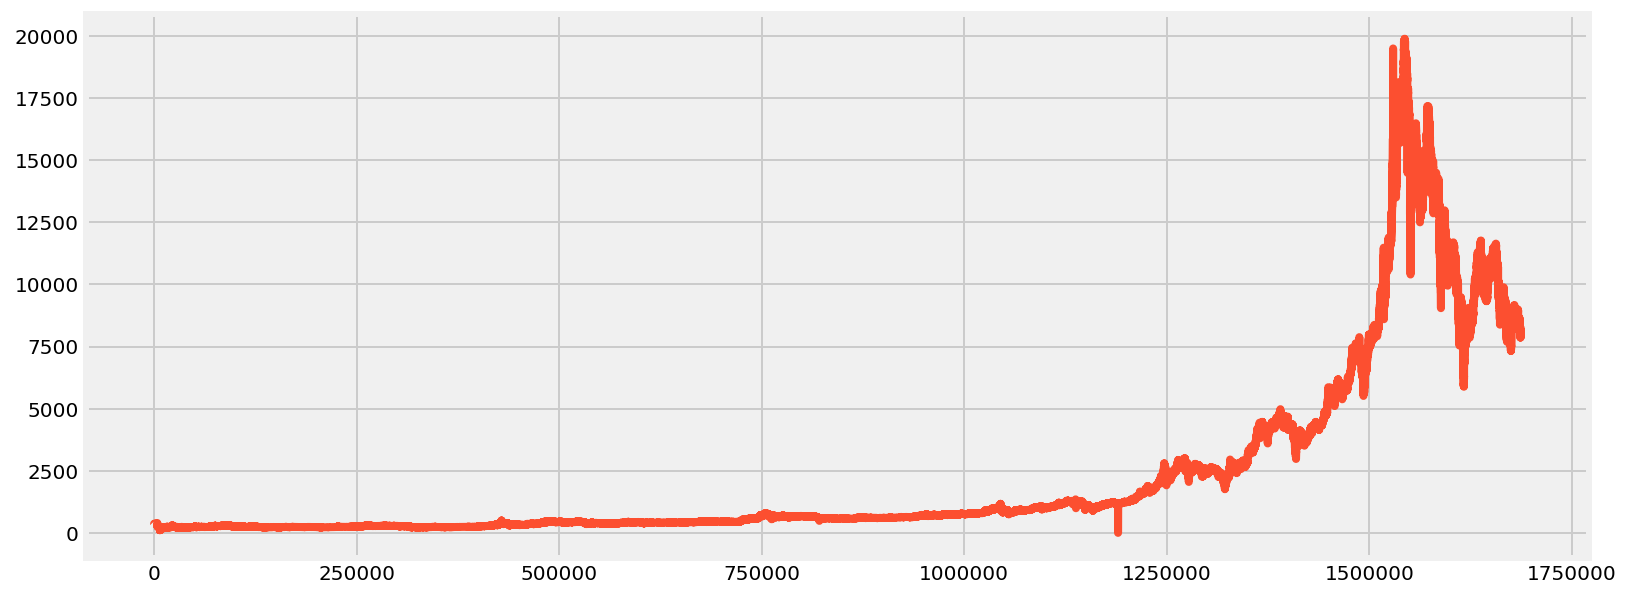

In [10]:
btc_close = btc['Close']

btc_close.plot(lw=0.5, figsize=(12, 5))
plt.plot(btc_close)
plt.show()

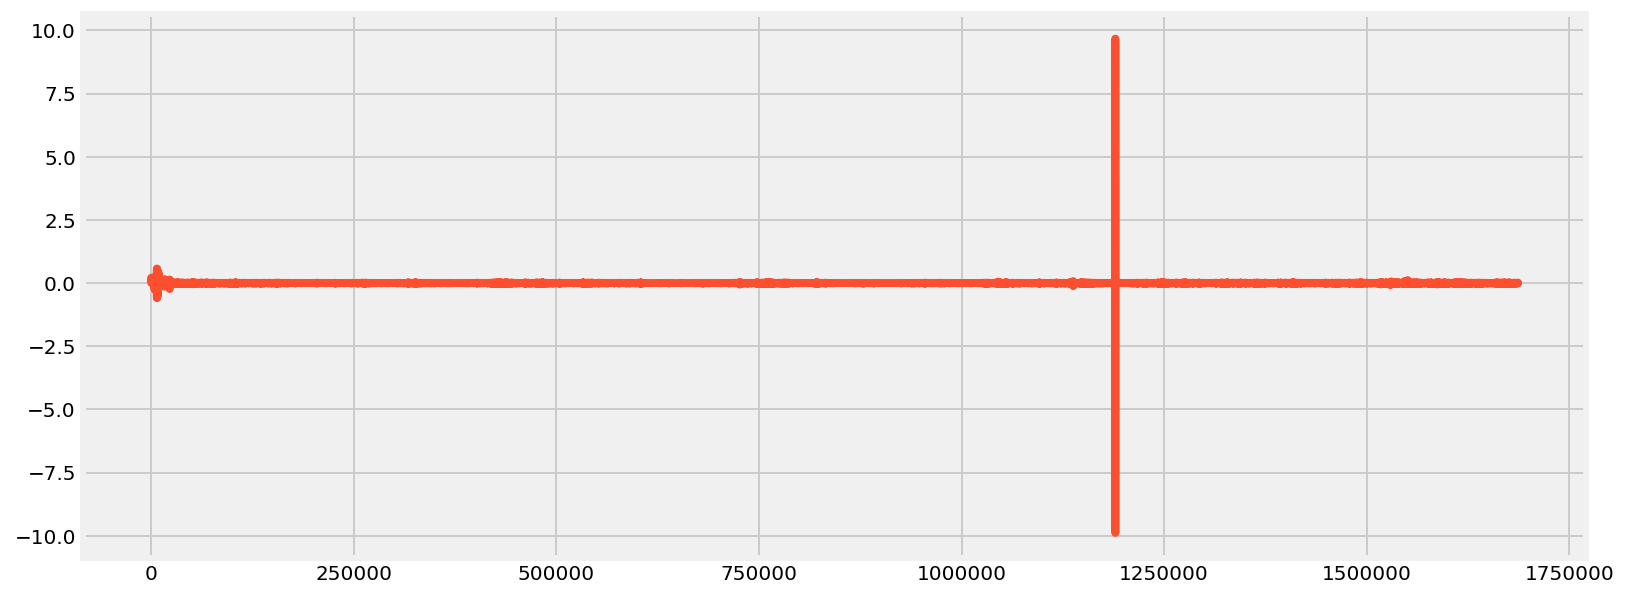

In [11]:
btc_log_close = btc['log_close']

btc_log_close.plot(lw=0.5, figsize=(12, 5))
plt.plot(btc_log_close)
plt.show()

Very strong price movements at the beginning of the time series.

In [12]:
# select relevant time frame
index_1 = btc[btc.Date == datetime.date(dt.datetime.strptime('01/27/18', '%x'))].index[0]
index_2 = btc[btc.Date == datetime.date(dt.datetime.strptime('03/27/18', '%x'))].index[0]
btc_1= btc.loc[index_1:index_2]
#df_1= df.loc[index_1:,]
btc_1.head()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price,log_close,year,...,hour,minute,Date,Time,Average,Volatility,SD,Average_log,Volatility_log,SD_log
1601633,2018-01-27 00:00:00+00:00,11086.88,11086.89,11086.88,11086.89,3.475604,38533.636812,11086.889272,0.000000e+00,2018,...,0,0,2018-01-27,00:00:00,13354.785311,367199.735578,1766.690552,-0.000008,0.471292,0.002268
1601634,2018-01-27 00:01:00+00:00,11086.89,11089.00,11086.88,11089.00,11.214766,124339.102380,11087.088342,1.902968e-04,2018,...,0,1,2018-01-27,00:01:00,13354.685122,367200.933752,1766.696316,-0.000008,0.471290,0.002267
1601635,2018-01-27 00:02:00+00:00,11089.00,11099.00,11089.00,11098.99,25.761195,285765.230790,11092.856235,9.004872e-04,2018,...,0,2,2018-01-27,00:02:00,13354.585167,367202.070136,1766.701784,-0.000008,0.471291,0.002268
1601636,2018-01-27 00:03:00+00:00,11098.99,11099.00,11098.99,11099.00,1.083112,12021.453112,11098.998581,9.009825e-07,2018,...,0,3,2018-01-27,00:03:00,13354.485213,367203.205280,1766.707245,-0.000008,0.471291,0.002268
1601637,2018-01-27 00:04:00+00:00,11098.99,11099.00,11098.99,11098.99,4.025234,44676.062985,11098.997333,-9.009825e-07,2018,...,0,4,2018-01-27,00:04:00,13354.386095,367204.540260,1766.713668,-0.000008,0.471285,0.002267


In [13]:
btc_1.tail()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price,log_close,year,...,hour,minute,Date,Time,Average,Volatility,SD,Average_log,Volatility_log,SD_log
1686589,2018-03-26 23:56:00+00:00,8155.00,8155.00,8154.99,8154.99,0.617945,5039.342643,8154.997667,0.000000,2018,...,23,56,2018-03-26,23:56:00,9434.270142,232584.323674,1119.021849,-0.000004,0.297959,0.001434
1686590,2018-03-26 23:57:00+00:00,8154.99,8154.99,8154.00,8154.01,40.655410,331543.193980,8154.958865,-0.000120,2018,...,23,57,2018-03-26,23:57:00,9434.234424,232587.698813,1119.038088,-0.000004,0.297949,0.001434
1686591,2018-03-26 23:58:00+00:00,8154.00,8154.01,8150.00,8150.00,9.856911,80340.432933,8150.670628,-0.000492,2018,...,23,58,2018-03-26,23:58:00,9434.198808,232591.105101,1119.054476,-0.000004,0.297948,0.001434
1686592,2018-03-26 23:59:00+00:00,8150.01,8150.01,8122.82,8145.00,68.274269,555026.852280,8129.370847,-0.000614,2018,...,23,59,2018-03-26,23:59:00,9434.163076,232594.538752,1119.070996,-0.000004,0.297949,0.001434
1686593,2018-03-27 00:00:00+00:00,8144.99,8145.01,8140.00,8140.00,37.842674,308202.442620,8144.309384,-0.000614,2018,...,0,0,2018-03-27,00:00:00,9434.127729,232598.022532,1119.087758,-0.000004,0.297941,0.001433


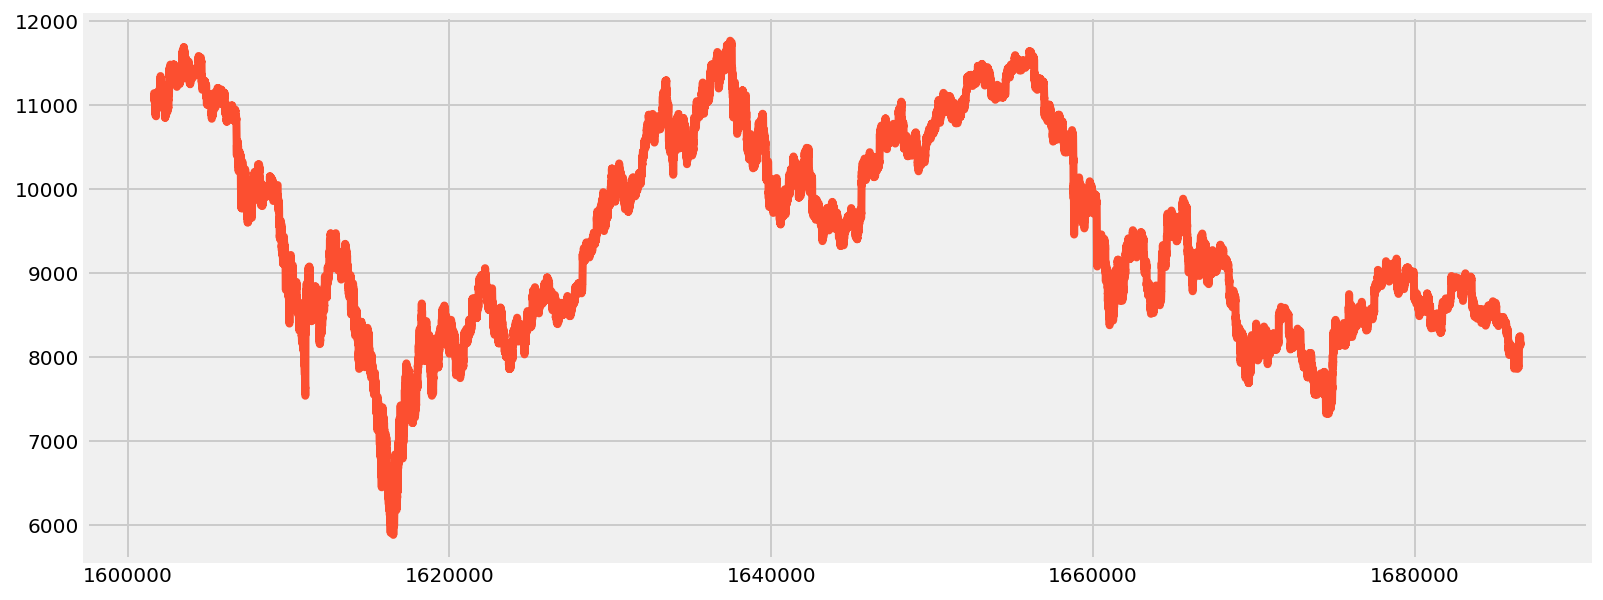

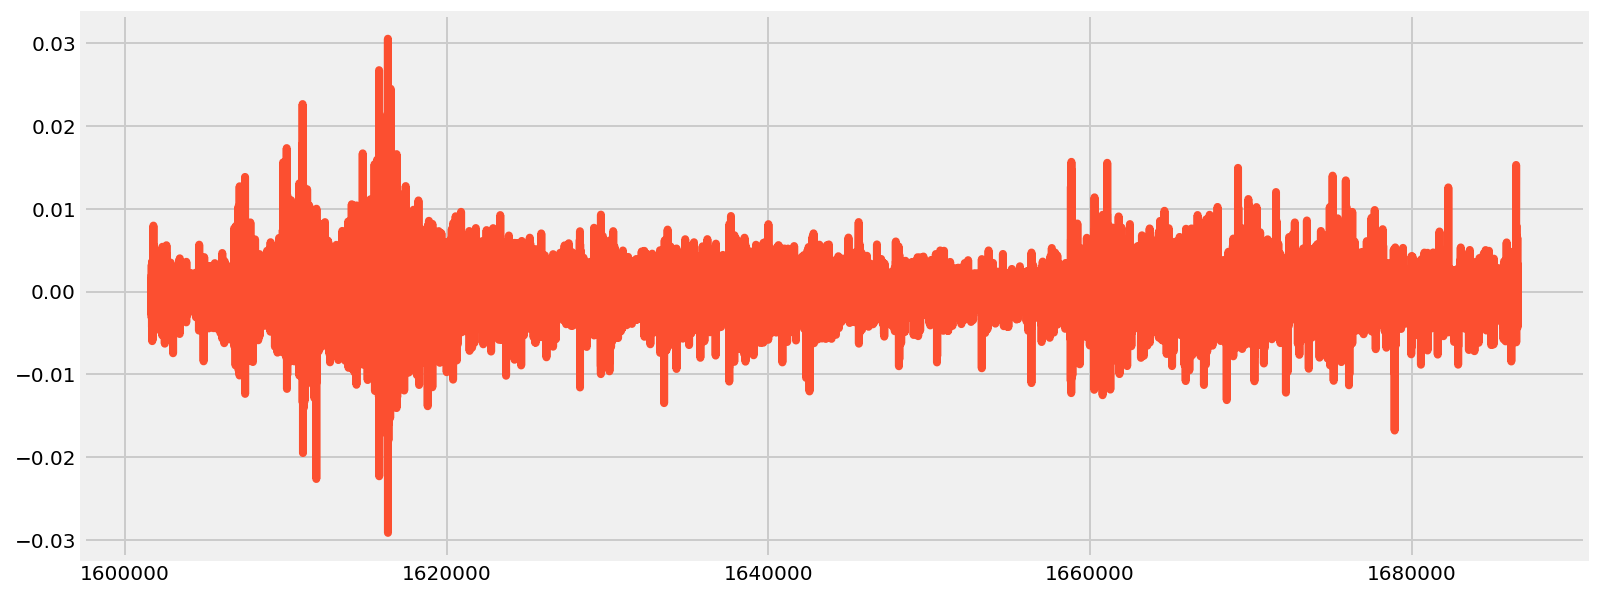

In [14]:
btc_close = btc_1['Close']

btc_close.plot(lw=0.5, figsize=(12, 5))
plt.plot(btc_close)
plt.show()


btc_log_close = btc_1['log_close']

btc_log_close.plot(lw=0.5, figsize=(12, 5))
plt.plot(btc_log_close)
plt.show()




In [15]:
print("total number of time points",len(btc_1.log_close))
print("number of two sigma events",len(btc_1.log_close[abs(btc_1.log_close)>2*btc_1.SD_log]))
print("precentage of two sigma events",len(btc_1.log_close[abs(btc_1.log_close)>2*btc_1.SD_log])/len(btc_1.log_close))

total number of time points 84961
number of two sigma events 3965
precentage of two sigma events 0.04666847141629689


Convert minute to daily data

In [16]:
btc = btc.set_index(btc["Timestamp"])
btc_daily = btc["Close"].resample('D').ohlc()
btc_daily.head()
btc_daily["Timestamp"] = btc_daily.index.values

In [17]:
btc_daily['log_close'] = np.log(btc_daily.close) - np.log(btc_daily.close.shift(1))

min_periods = 30 # 30 days

price=btc_daily['close']
# Calculate the sd and volatility
mean=price.rolling(min_periods).mean()
sd=price.rolling(min_periods).std()
vol = price.rolling(min_periods).std() * np.sqrt(min_periods) 
btc_daily['Average']=mean
btc_daily['Volatility']=vol
btc_daily['SD']=sd

price_log=btc_daily['log_close']
# Calculate the sd and volatility
mean=price_log.rolling(min_periods).mean()
sd=price_log.rolling(min_periods).std()
vol = price_log.rolling(min_periods).std() * np.sqrt(min_periods) 
btc_daily['Average_log']=mean
btc_daily['Volatility_log']=vol
btc_daily['SD_log']=sd

btc_daily['Date'] = pd.to_datetime(btc_daily["Timestamp"]).dt.date
btc_daily['Time'] = pd.to_datetime(btc_daily['Timestamp']).dt.time

btc_daily["year"] = pd.DatetimeIndex(btc_daily.Timestamp).year
btc_daily["month"] = pd.DatetimeIndex(btc_daily.Timestamp).month
btc_daily["day"] = pd.DatetimeIndex(btc_daily.Timestamp).day
btc_daily["hour"] = pd.DatetimeIndex(btc_daily.Timestamp).hour
btc_daily["minute"] = pd.DatetimeIndex(btc_daily.Timestamp).minute






btc_daily.head()

,open,high,low,close,Timestamp,log_close,Average,Volatility,SD,Average_log,Volatility_log,SD_log,Date,Time,year,month,day,hour,minute
Timestamp,,,,,,,,,,,,,,,,,,,
2014-12-01 00:00:00+00:00,300.0,370.0,300.00,370.0,2014-12-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014-12-01,00:00:00,2014,12,1,0,0
2014-12-02 00:00:00+00:00,370.0,378.0,370.00,378.0,2014-12-02,0.021391,NaN,NaN,NaN,NaN,NaN,NaN,2014-12-02,00:00:00,2014,12,2,0,0
2014-12-03 00:00:00+00:00,378.0,378.0,377.01,378.0,2014-12-03,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,2014-12-03,00:00:00,2014,12,3,0,0
2014-12-04 00:00:00+00:00,378.0,378.0,377.10,377.1,2014-12-04,-0.002384,NaN,NaN,NaN,NaN,NaN,NaN,2014-12-04,00:00:00,2014,12,4,0,0
2014-12-05 00:00:00+00:00,NaN,NaN,NaN,NaN,2014-12-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014-12-05,00:00:00,2014,12,5,0,0


In [18]:
# select relevant time frame
index_1 = btc_daily[btc_daily.Date == datetime.date(dt.datetime.strptime('01/27/18', '%x'))].index[0]
index_2 = btc_daily[btc_daily.Date == datetime.date(dt.datetime.strptime('03/27/18', '%x'))].index[0]
btc_1_daily= btc_daily.loc[index_1:index_2]
#df_1= df.loc[index_1:,]
btc_1_daily.head()

,open,high,low,close,Timestamp,log_close,Average,Volatility,SD,Average_log,Volatility_log,SD_log,Date,Time,year,month,day,hour,minute
Timestamp,,,,,,,,,,,,,,,,,,,
2018-01-27 00:00:00+00:00,11086.89,11488.09,10850.01,11319.00,2018-01-27,0.020719,13308.200667,10326.707067,1885.390135,-0.008140,0.360630,0.065842,2018-01-27,00:00:00,2018,1,27,0,0
2018-01-28 00:00:00+00:00,11319.00,11694.98,11251.31,11536.00,2018-01-28,0.018990,13207.232333,10389.386313,1896.833748,-0.007772,0.361308,0.065966,2018-01-28,00:00:00,2018,1,28,0,0
2018-01-29 00:00:00+00:00,11536.01,11570.00,10840.00,11123.01,2018-01-29,-0.036457,13149.999667,10592.070139,1933.838582,-0.004785,0.341531,0.062355,2018-01-29,00:00:00,2018,1,29,0,0
2018-01-30 00:00:00+00:00,11111.00,11150.00,9769.73,9995.00,2018-01-30,-0.106931,13021.062000,11020.307518,2012.023673,-0.010905,0.345559,0.063090,2018-01-30,00:00:00,2018,1,30,0,0
2018-01-31 00:00:00+00:00,9990.10,10298.99,9602.01,10099.99,2018-01-31,0.010449,12908.394667,11386.932122,2078.959861,-0.009622,0.345729,0.063121,2018-01-31,00:00:00,2018,1,31,0,0


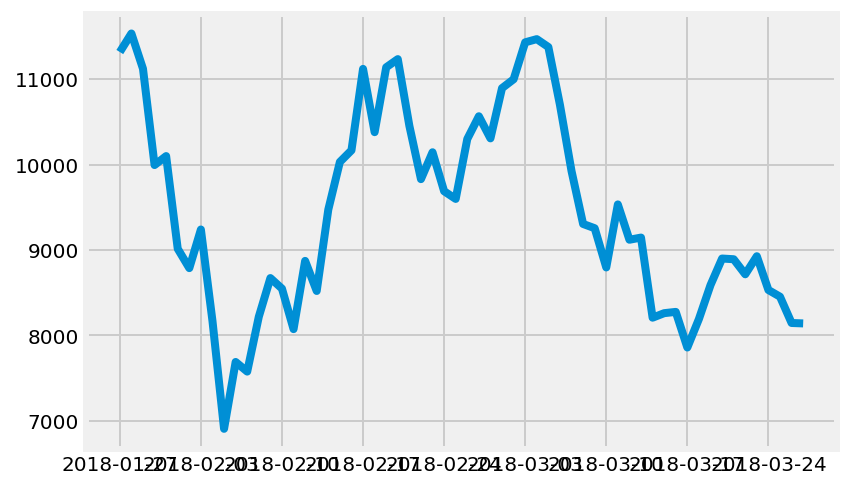

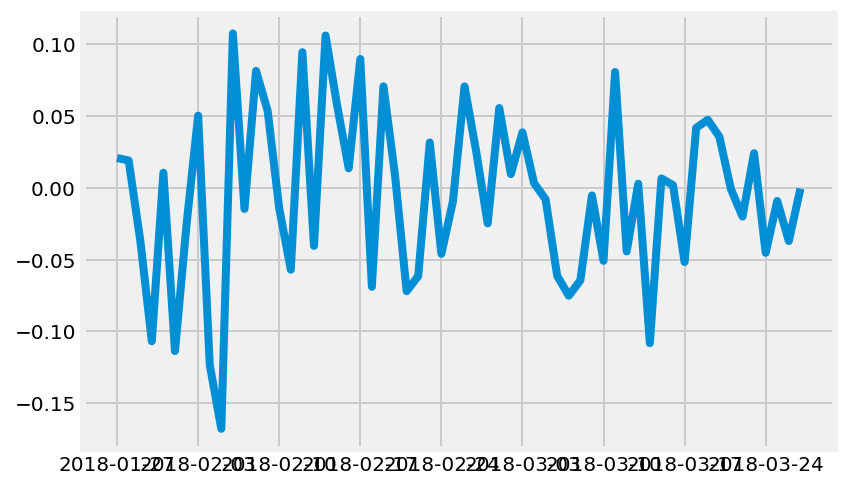

In [19]:
btc_close_daily = btc_1_daily['close']

plt.plot(btc_close_daily)
plt.show()

btc_close_daily_log = btc_1_daily["log_close"]
plt.plot(btc_close_daily_log)
plt.show()

In [20]:
print("total number of time points",len(btc_1_daily.log_close))
print("number of two sigma events",len(btc_1_daily.log_close[abs(btc_1_daily.log_close)>2*btc_1_daily.SD_log]))
print("precentage of two sigma events",len(btc_1_daily.log_close[abs(btc_1_daily.log_close)>2*btc_1_daily.SD_log])/len(btc_1_daily.log_close))

total number of time points 60
number of two sigma events 2
precentage of two sigma events 0.03333333333333333


Convert minute to 15 min data

In [21]:
btc = btc.set_index(btc["Timestamp"])
btc_15_min = btc["Close"].resample('15min').ohlc()
btc_15_min.head()
btc_15_min["Timestamp"] = btc_15_min.index.values

In [22]:
btc_15_min['log_close'] = np.log(btc_15_min.close) - np.log(btc_15_min.close.shift(1))

min_periods = 2880 # 30 days * 24 hours * 4 (15 minutes/hour)

price=btc_15_min['close']
# Calculate the sd and volatility
mean=price.rolling(min_periods).mean()
sd=price.rolling(min_periods).std()
vol = price.rolling(min_periods).std() * np.sqrt(min_periods) 
btc_15_min['Average']=mean
btc_15_min['Volatility']=vol
btc_15_min['SD']=sd

price_log=btc_15_min['log_close']
# Calculate the sd and volatility
mean=price_log.rolling(min_periods).mean()
sd=price_log.rolling(min_periods).std()
vol = price_log.rolling(min_periods).std() * np.sqrt(min_periods) 
btc_15_min['Average_log']=mean
btc_15_min['Volatility_log']=vol
btc_15_min['SD_log']=sd

btc_15_min['Date'] = pd.to_datetime(btc_15_min["Timestamp"]).dt.date
btc_15_min['Time'] = pd.to_datetime(btc_15_min['Timestamp']).dt.time

btc_15_min["year"] = pd.DatetimeIndex(btc_15_min.Timestamp).year
btc_15_min["month"] = pd.DatetimeIndex(btc_15_min.Timestamp).month
btc_15_min["day"] = pd.DatetimeIndex(btc_15_min.Timestamp).day
btc_15_min["hour"] = pd.DatetimeIndex(btc_15_min.Timestamp).hour
btc_15_min["minute"] = pd.DatetimeIndex(btc_15_min.Timestamp).minute

btc_15_min.head()

,open,high,low,close,Timestamp,log_close,Average,Volatility,SD,Average_log,Volatility_log,SD_log,Date,Time,year,month,day,hour,minute
Timestamp,,,,,,,,,,,,,,,,,,,
2014-12-01 05:30:00+00:00,300.0,300.0,300.0,300.0,2014-12-01 05:30:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014-12-01,05:30:00,2014,12,1,5,30
2014-12-01 05:45:00+00:00,300.0,300.0,300.0,300.0,2014-12-01 05:45:00,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,2014-12-01,05:45:00,2014,12,1,5,45
2014-12-01 06:00:00+00:00,300.0,300.0,300.0,300.0,2014-12-01 06:00:00,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,2014-12-01,06:00:00,2014,12,1,6,0
2014-12-01 06:15:00+00:00,300.0,370.0,300.0,370.0,2014-12-01 06:15:00,0.209721,NaN,NaN,NaN,NaN,NaN,NaN,2014-12-01,06:15:00,2014,12,1,6,15
2014-12-01 06:30:00+00:00,370.0,370.0,370.0,370.0,2014-12-01 06:30:00,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,2014-12-01,06:30:00,2014,12,1,6,30


In [23]:
# select relevant time frame
index_1 = btc_15_min[btc_15_min.Date == datetime.date(dt.datetime.strptime('01/27/18', '%x'))].index[0]
index_2 = btc_15_min[btc_15_min.Date == datetime.date(dt.datetime.strptime('03/27/18', '%x'))].index[0]
btc_1_15_min= btc_15_min.loc[index_1:index_2]
#df_1= df.loc[index_1:,]
btc_1_15_min.head()

,open,high,low,close,Timestamp,log_close,Average,Volatility,SD,Average_log,Volatility_log,SD_log,Date,Time,year,month,day,hour,minute
Timestamp,,,,,,,,,,,,,,,,,,,
2018-01-27 00:00:00+00:00,11086.89,11144.99,11086.89,11130.00,2018-01-27 00:00:00,0.003881,13352.707319,94805.065376,1766.588090,-0.000113,0.461228,0.008594,2018-01-27,00:00:00,2018,1,27,0,0
2018-01-27 00:15:00+00:00,11100.01,11100.02,11050.00,11050.00,2018-01-27 00:15:00,-0.007214,13351.244372,94813.748811,1766.749896,-0.000112,0.461191,0.008594,2018-01-27,00:15:00,2018,1,27,0,15
2018-01-27 00:30:00+00:00,11050.00,11123.11,11050.00,11123.10,2018-01-27 00:30:00,0.006594,13349.819639,94821.359935,1766.891721,-0.000109,0.461234,0.008595,2018-01-27,00:30:00,2018,1,27,0,30
2018-01-27 00:45:00+00:00,11101.14,11101.14,11053.67,11057.00,2018-01-27 00:45:00,-0.005960,13348.376479,94830.740704,1767.066521,-0.000111,0.461270,0.008595,2018-01-27,00:45:00,2018,1,27,0,45
2018-01-27 01:00:00+00:00,11057.00,11057.00,10984.99,10987.92,2018-01-27 01:00:00,-0.006267,13346.930177,94842.913672,1767.293351,-0.000112,0.461295,0.008596,2018-01-27,01:00:00,2018,1,27,1,0


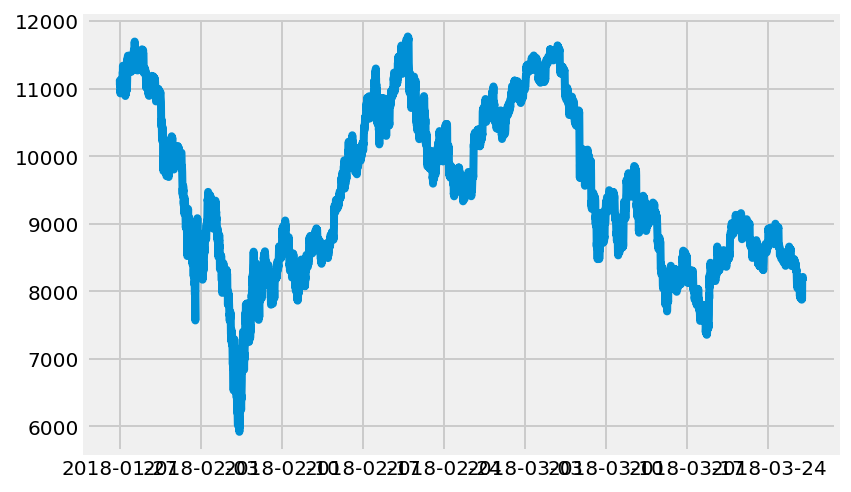

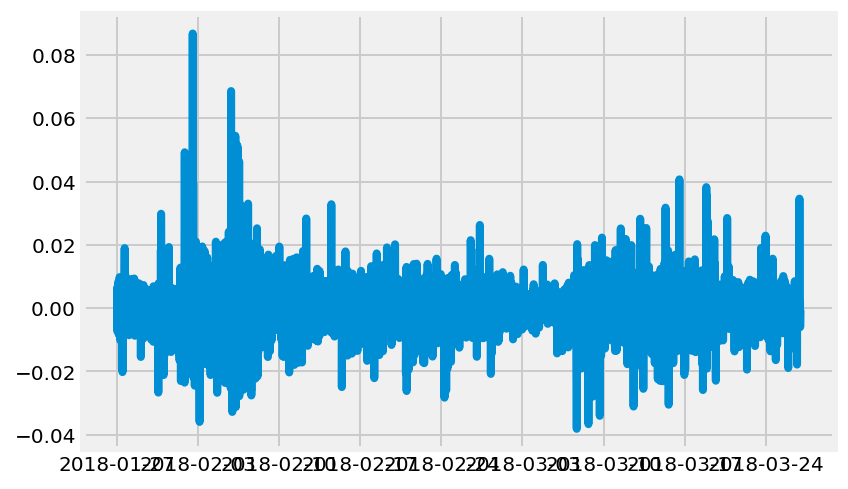

In [24]:
btc_close_15_min = btc_1_15_min['close']

plt.plot(btc_close_15_min)
plt.show()

btc_close_15_min_log = btc_1_15_min["log_close"]
plt.plot(btc_close_15_min_log)
plt.show()

In [25]:
print("total number of time points",len(btc_1_15_min.log_close))
print("number of two sigma events",len(btc_1_15_min.log_close[abs(btc_1_15_min.log_close)>2*btc_1_15_min.SD_log]))
print("precentage of two sigma events",len(btc_1_15_min.log_close[abs(btc_1_15_min.log_close)>2*btc_1_15_min.SD_log])/len(btc_1_15_min.log_close))

total number of time points 5665
number of two sigma events 242
precentage of two sigma events 0.04271844660194175


Convert minute to 60 minute data

In [26]:
btc = btc.set_index(btc["Timestamp"])
btc_60_min = btc["Close"].resample('60min').ohlc()
btc_60_min.head()
btc_60_min["Timestamp"] = btc_60_min.index.values

In [27]:
btc_60_min['log_close'] = np.log(btc_60_min.close) - np.log(btc_60_min.close.shift(1))

min_periods = 2880 # 30 days * 24 hours * 4 (15 minutes/hour)

price=btc_60_min['close']
# Calculate the sd and volatility
mean=price.rolling(min_periods).mean()
sd=price.rolling(min_periods).std()
vol = price.rolling(min_periods).std() * np.sqrt(min_periods) 
btc_60_min['Average']=mean
btc_60_min['Volatility']=vol
btc_60_min['SD']=sd

price_log=btc_60_min['log_close']
# Calculate the sd and volatility
mean=price_log.rolling(min_periods).mean()
sd=price_log.rolling(min_periods).std()
vol = price_log.rolling(min_periods).std() * np.sqrt(min_periods) 
btc_60_min['Average_log']=mean
btc_60_min['Volatility_log']=vol
btc_60_min['SD_log']=sd

btc_60_min['Date'] = pd.to_datetime(btc_60_min["Timestamp"]).dt.date
btc_60_min['Time'] = pd.to_datetime(btc_60_min['Timestamp']).dt.time

btc_60_min["year"] = pd.DatetimeIndex(btc_60_min.Timestamp).year
btc_60_min["month"] = pd.DatetimeIndex(btc_60_min.Timestamp).month
btc_60_min["day"] = pd.DatetimeIndex(btc_60_min.Timestamp).day
btc_60_min["hour"] = pd.DatetimeIndex(btc_60_min.Timestamp).hour
btc_60_min["minute"] = pd.DatetimeIndex(btc_60_min.Timestamp).minute

btc_60_min.head()

,open,high,low,close,Timestamp,log_close,Average,Volatility,SD,Average_log,Volatility_log,SD_log,Date,Time,year,month,day,hour,minute
Timestamp,,,,,,,,,,,,,,,,,,,
2014-12-01 05:00:00+00:00,300.0,300.0,300.0,300.0,2014-12-01 05:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014-12-01,05:00:00,2014,12,1,5,0
2014-12-01 06:00:00+00:00,300.0,370.0,300.0,370.0,2014-12-01 06:00:00,0.209721,NaN,NaN,NaN,NaN,NaN,NaN,2014-12-01,06:00:00,2014,12,1,6,0
2014-12-01 07:00:00+00:00,370.0,370.0,370.0,370.0,2014-12-01 07:00:00,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,2014-12-01,07:00:00,2014,12,1,7,0
2014-12-01 08:00:00+00:00,370.0,370.0,370.0,370.0,2014-12-01 08:00:00,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,2014-12-01,08:00:00,2014,12,1,8,0
2014-12-01 09:00:00+00:00,370.0,370.0,370.0,370.0,2014-12-01 09:00:00,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,2014-12-01,09:00:00,2014,12,1,9,0


In [28]:
# select relevant time frame
index_1 = btc_60_min[btc_60_min.Date == datetime.date(dt.datetime.strptime('01/27/18', '%x'))].index[0]
index_2 = btc_60_min[btc_60_min.Date == datetime.date(dt.datetime.strptime('03/27/18', '%x'))].index[0]
btc_1_60_min= btc_60_min.loc[index_1:index_2]
#df_1= df.loc[index_1:,]
btc_1_60_min.head()

,open,high,low,close,Timestamp,log_close,Average,Volatility,SD,Average_log,Volatility_log,SD_log,Date,Time,year,month,day,hour,minute
Timestamp,,,,,,,,,,,,,,,,,,,
2018-01-27 00:00:00+00:00,11086.89,11144.99,11050.00,11057.00,2018-01-27 00:00:00,-0.002700,10163.412260,235419.973640,4386.792203,0.000337,0.769766,0.014344,2018-01-27,00:00:00,2018,1,27,0,0
2018-01-27 01:00:00+00:00,11057.00,11057.00,10888.15,10955.55,2018-01-27 01:00:00,-0.009218,10165.773219,235344.585603,4385.387430,0.000337,0.769770,0.014344,2018-01-27,01:00:00,2018,1,27,1,0
2018-01-27 02:00:00+00:00,10920.47,11149.99,10869.72,11079.41,2018-01-27 02:00:00,0.011242,10168.204240,235267.547624,4383.951912,0.000347,0.769606,0.014341,2018-01-27,02:00:00,2018,1,27,2,0
2018-01-27 03:00:00+00:00,11100.01,11122.01,10959.91,10980.01,2018-01-27 03:00:00,-0.009012,10170.607889,235189.514863,4382.497857,0.000346,0.769644,0.014341,2018-01-27,03:00:00,2018,1,27,3,0
2018-01-27 04:00:00+00:00,10980.01,11091.00,10980.01,11000.00,2018-01-27 04:00:00,0.001819,10173.013028,235111.862885,4381.050898,0.000345,0.769637,0.014341,2018-01-27,04:00:00,2018,1,27,4,0


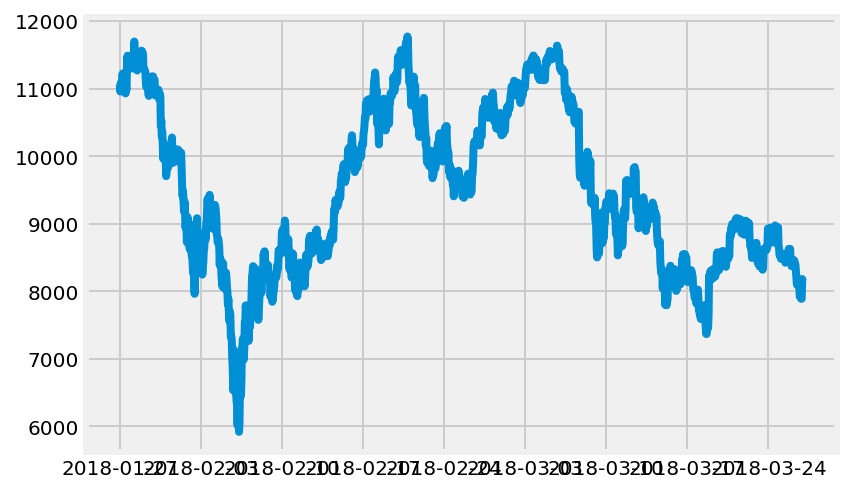

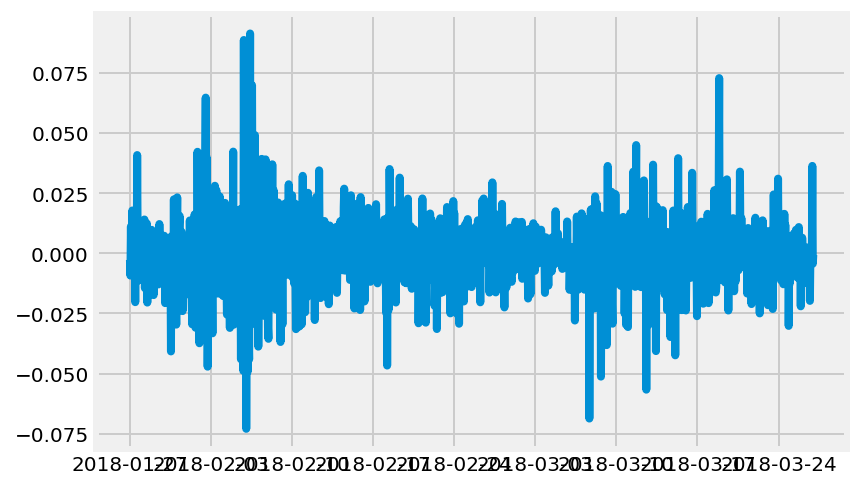

In [29]:
btc_close_60_min = btc_1_60_min['close']

plt.plot(btc_close_60_min)
plt.show()

btc_close_60_min_log = btc_1_60_min["log_close"]
plt.plot(btc_close_60_min_log)
plt.show()

In [30]:
print("total number of time points",len(btc_1_60_min.log_close))
print("number of two sigma events",len(btc_1_60_min.log_close[abs(btc_1_60_min.log_close)>2*btc_1_60_min.SD_log]))
print("precentage of two sigma events",len(btc_1_60_min.log_close[abs(btc_1_60_min.log_close)>2*btc_1_60_min.SD_log])/len(btc_1_60_min.log_close))

total number of time points 1417
number of two sigma events 57
precentage of two sigma events 0.04022582921665491


# Look at the properties of the time series. Fit ARIMA models. 

Daily Data

In [32]:
btc_1_daily["log_close"].describe()

count    60.000000
mean     -0.005150
std       0.059872
min      -0.167940
25%      -0.045516
50%      -0.000767
75%       0.036318
max       0.107447
Name: log_close, dtype: float64

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: 'pandas.tools.plotting.autocorrelation_plot' is deprecated, import 'pandas.plotting.autocorrelation_plot' instead.
  


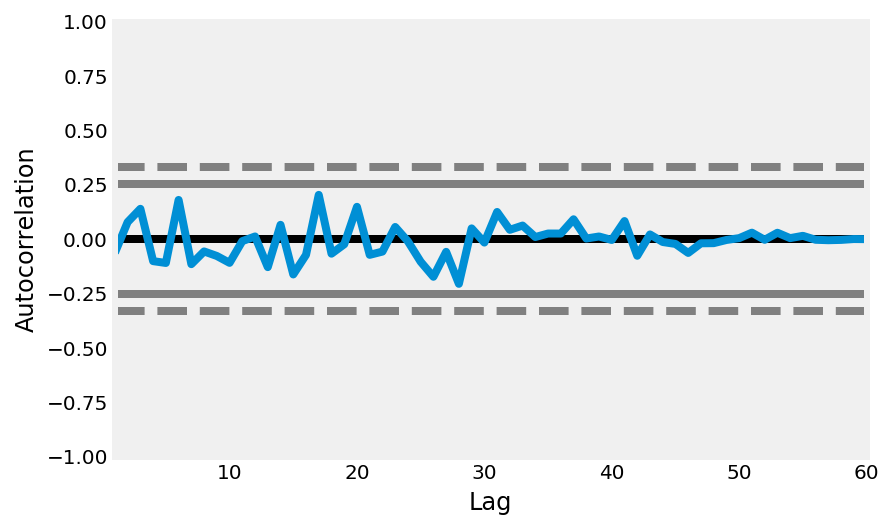

In [34]:
from pandas.tools.plotting import autocorrelation_plot
autocorrelation_plot(btc_1_daily["log_close"])
#pyplot.show()

In [43]:
from statsmodels.tsa.arima_model import ARIMA
#https://machinelearningmastery.com/arima-for-time-series-forecasting-with-python/

aic = 0
for i in range(0,4):
    for j in range(0,4):
        try:
            model = ARIMA(btc_1_daily["log_close"], order=(i,0,j))
            model_fit = model.fit(disp=0)
            print("model converged for",i,j)
        except:
            model = ARIMA(btc_1_daily["log_close"], order=(0,0,0))
            model_fit = model.fit(disp=0)
            print("model did not converge for",i,j)
            
        
        if model_fit.aic<aic:
            print("model_fit_aic",model_fit.aic)
            aic = model_fit.aic
            best_parameter_i = i
            best_parameter_j = j
        
        
        
model = ARIMA(btc_1_daily["log_close"], order=(best_parameter_i,0,best_parameter_j))
model_fit = model.fit(disp=0)


print(model_fit.summary())
print(model_fit.aic)

/anaconda3/lib/python3.6/site-packages/scipy/signal/signaltools.py:1341: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out_full[ind] += zi
/anaconda3/lib/python3.6/site-packages/scipy/signal/signaltools.py:1344: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out = out_full[ind]
/anaconda3/lib/python3.6/site-packages/scipy/signal/signaltools.py:1350: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `ar

model converged for 0 0
model_fit_aic -164.60039511845287
model converged for 0 1
model converged for 0 2
model converged for 0 3
model converged for 1 0
model did not converge for 1 1
model did not converge for 1 2
model did not converge for 1 3
model converged for 2 0
model converged for 2 1
model did not converge for 2 2
model did not converge for 2 3
model converged for 3 0
model converged for 3 1
model converged for 3 2
model did not converge for 3 3
                              ARMA Model Results                              
Dep. Variable:              log_close   No. Observations:                   60
Model:                     ARMA(0, 0)   Log Likelihood                  84.300
Method:                           css   S.D. of innovations              0.059
Date:                Sat, 20 Oct 2018   AIC                           -164.600
Time:                        17:29:21   BIC                           -160.412
Sample:                    01-27-2018   HQIC                      

Best model is an ARIMA(0,0,0), indicating that there is not signifiacant information in past prices. Prices are not predictable. 

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: 'pandas.tools.plotting.autocorrelation_plot' is deprecated, import 'pandas.plotting.autocorrelation_plot' instead.
  """Entry point for launching an IPython kernel.


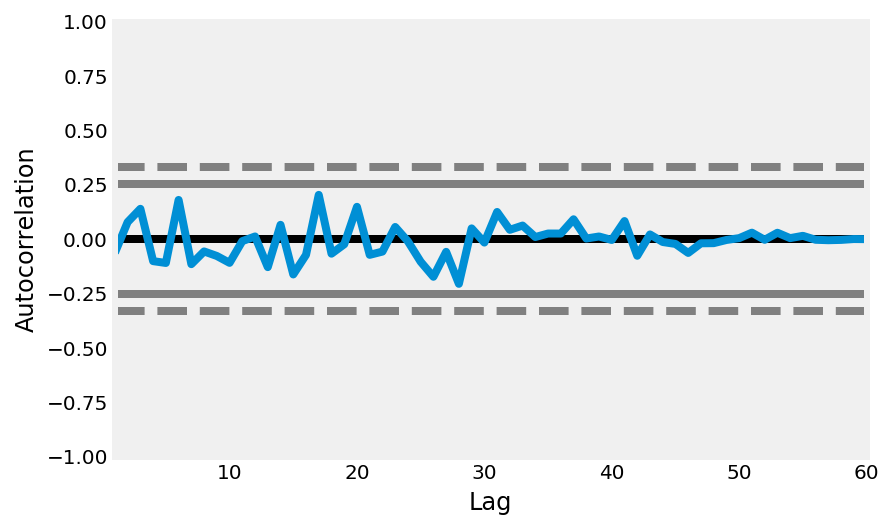

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: 'pandas.tools.plotting.autocorrelation_plot' is deprecated, import 'pandas.plotting.autocorrelation_plot' instead.
  This is separate from the ipykernel package so we can avoid doing imports until


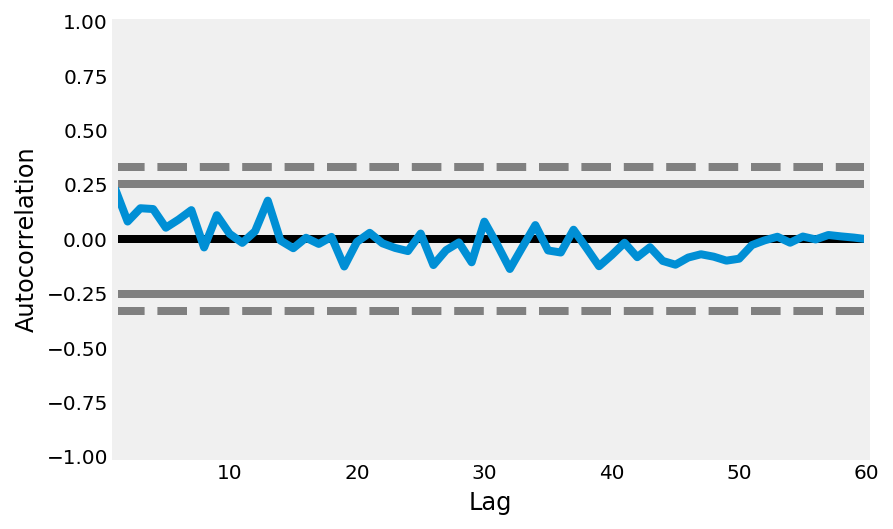

In [49]:
autocorrelation_plot(model_fit.resid)
plt.show()
autocorrelation_plot(model_fit.resid*model_fit.resid)
plt.show()


Since there is no significant autocorrelation left in the resiudals and also not in the squared residuals, we have a good model fit and do not need additional modelling (GARCH).

Hourly Data

In [53]:
btc_1_60_min["log_close"].describe()

count    1417.000000
mean       -0.000218
std         0.014115
min        -0.073022
25%        -0.006908
50%        -0.000047
75%         0.006329
max         0.091553
Name: log_close, dtype: float64

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: 'pandas.tools.plotting.autocorrelation_plot' is deprecated, import 'pandas.plotting.autocorrelation_plot' instead.
  """Entry point for launching an IPython kernel.


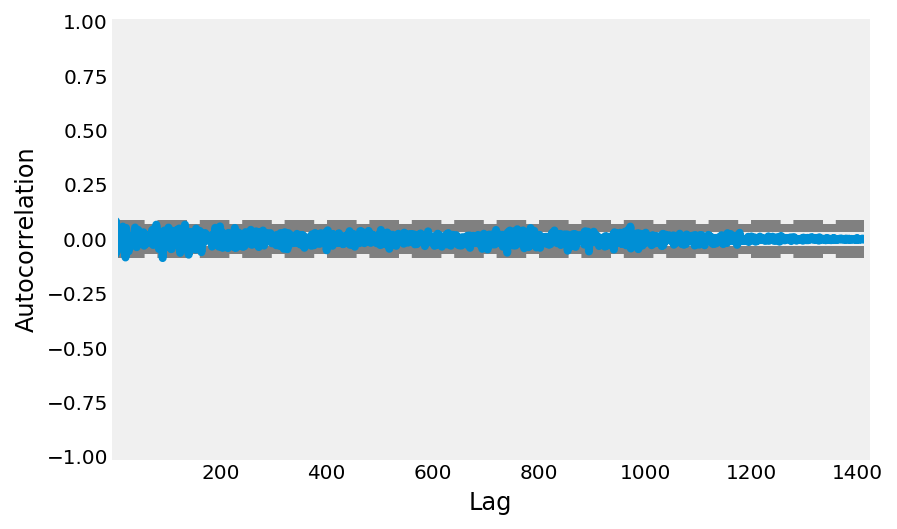

In [62]:
autocorrelation_plot(btc_1_60_min["log_close"])


In [63]:
aic = 0
for i in range(0,4):
    for j in range(0,4):
        try:
            model = ARIMA(btc_1_60_min["log_close"], order=(i,0,j))
            model_fit = model.fit(disp=0)
            print("model converged for",i,j)
        except:
            model = ARIMA(btc_1_60_min["log_close"], order=(0,0,0))
            model_fit = model.fit(disp=0)
            print("model did not converge for",i,j)
            
        
        if model_fit.aic<aic:
            print("model_fit_aic",model_fit.aic)
            aic = model_fit.aic
            best_parameter_i = i
            best_parameter_j = j
        
        
        
model = ARIMA(btc_1_60_min["log_close"], order=(best_parameter_i,0,best_parameter_j))
model_fit = model.fit(disp=0)


print(model_fit.summary())
print(model_fit.aic)

/anaconda3/lib/python3.6/site-packages/scipy/signal/signaltools.py:1341: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out_full[ind] += zi
/anaconda3/lib/python3.6/site-packages/scipy/signal/signaltools.py:1344: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out = out_full[ind]
/anaconda3/lib/python3.6/site-packages/scipy/signal/signaltools.py:1350: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `ar

model converged for 0 0
model_fit_aic -8050.043369645666
model converged for 0 1
model_fit_aic -8052.984768203886
model converged for 0 2
model_fit_aic -8056.26167802193
model converged for 0 3
model_fit_aic -8062.5268767159605
model converged for 1 0
model converged for 1 1
model converged for 1 2
model converged for 1 3
model converged for 2 0
model converged for 2 1
model converged for 2 2
model_fit_aic -8068.819067936033
model converged for 2 3
model converged for 3 0
model converged for 3 1
model converged for 3 2
model converged for 3 3
                              ARMA Model Results                              
Dep. Variable:              log_close   No. Observations:                 1417
Model:                     ARMA(2, 2)   Log Likelihood                4040.410
Method:                       css-mle   S.D. of innovations              0.014
Date:                Sat, 20 Oct 2018   AIC                          -8068.819
Time:                        17:45:37   BIC             

The final model is an ARIMA(2,0,2) indicating significant information left in past prices. 

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: 'pandas.tools.plotting.autocorrelation_plot' is deprecated, import 'pandas.plotting.autocorrelation_plot' instead.
  """Entry point for launching an IPython kernel.


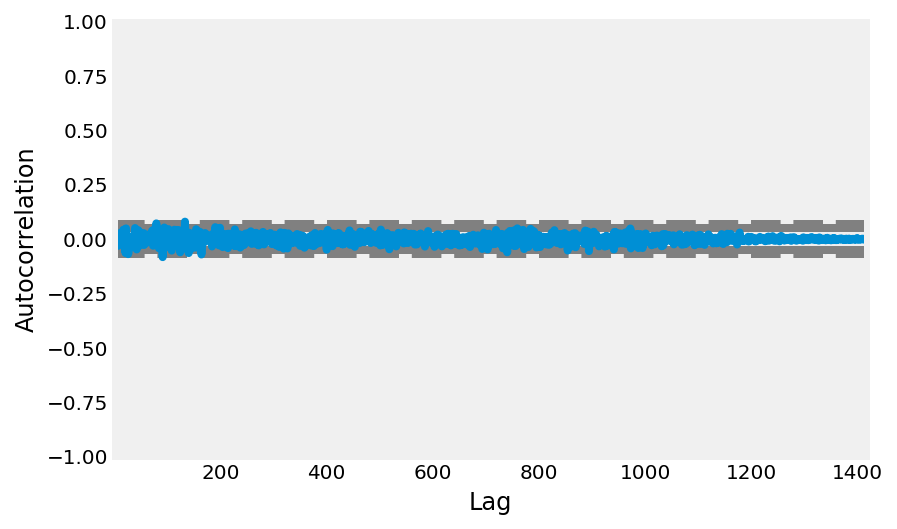

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: 'pandas.tools.plotting.autocorrelation_plot' is deprecated, import 'pandas.plotting.autocorrelation_plot' instead.
  This is separate from the ipykernel package so we can avoid doing imports until


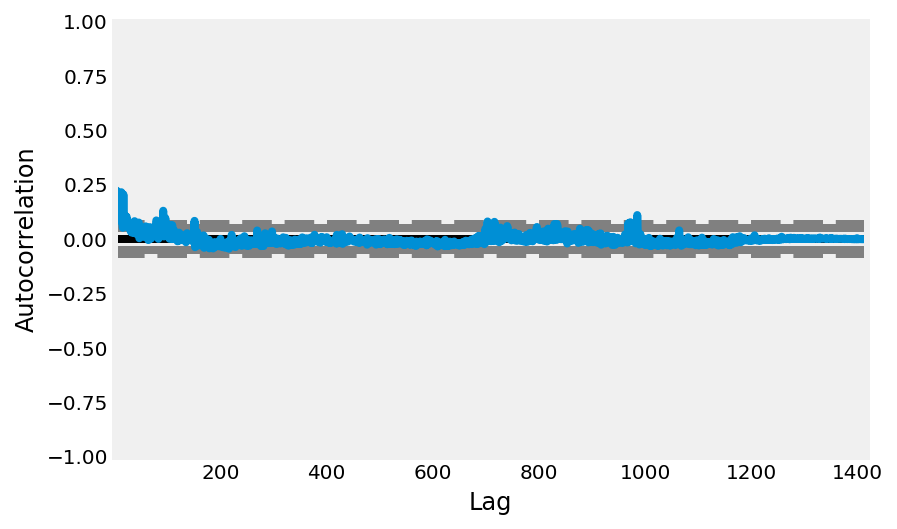

In [55]:
autocorrelation_plot(model_fit.resid)
plt.show()
autocorrelation_plot(model_fit.resid*model_fit.resid)
plt.show()

The autocorrelation plot of residuals does not show significant spikes. However, the squared residuals show significant autocorrelation spikes, indicating possibility to model volatility (GARCH).

In [79]:
# garch modeling
#https://machinelearningmastery.com/develop-arch-and-garch-models-for-time-series-forecasting-in-python/
#http://barnesanalytics.com/garch-models-in-python
from arch import arch_model

returns = btc_1_60_min["log_close"]

model=arch_model(returns, vol='Arch', p=10, mean = 'Zero')
results=model.fit()
print(results.summary())

Iteration:      1,   Func. Count:     13,   Neg. LLF: -4152.310693886026
Iteration:      2,   Func. Count:     27,   Neg. LLF: -4158.650996584202
Iteration:      3,   Func. Count:     41,   Neg. LLF: -4160.922430568321
Iteration:      4,   Func. Count:     56,   Neg. LLF: -4161.264905231357
Iteration:      5,   Func. Count:     71,   Neg. LLF: -4161.458933073258
Iteration:      6,   Func. Count:     87,   Neg. LLF: -4161.742550063412
Iteration:      7,   Func. Count:    102,   Neg. LLF: -4161.963520928917
Iteration:      8,   Func. Count:    116,   Neg. LLF: -4162.777770780856
Iteration:      9,   Func. Count:    131,   Neg. LLF: -4163.092303819656
Iteration:     10,   Func. Count:    146,   Neg. LLF: -4163.326141139232
Iteration:     11,   Func. Count:    160,   Neg. LLF: -4163.860047606306
Iteration:     12,   Func. Count:    175,   Neg. LLF: -4164.010869255215
Iteration:     13,   Func. Count:    190,   Neg. LLF: -4164.139087789897
Iteration:     14,   Func. Count:    205,   Neg. LL

Minute Data

In [56]:
btc_1["log_close"].describe()

count    84961.000000
mean        -0.000004
std          0.001861
min         -0.029140
25%         -0.000447
50%          0.000000
75%          0.000501
max          0.030531
Name: log_close, dtype: float64

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: 'pandas.tools.plotting.autocorrelation_plot' is deprecated, import 'pandas.plotting.autocorrelation_plot' instead.
  """Entry point for launching an IPython kernel.


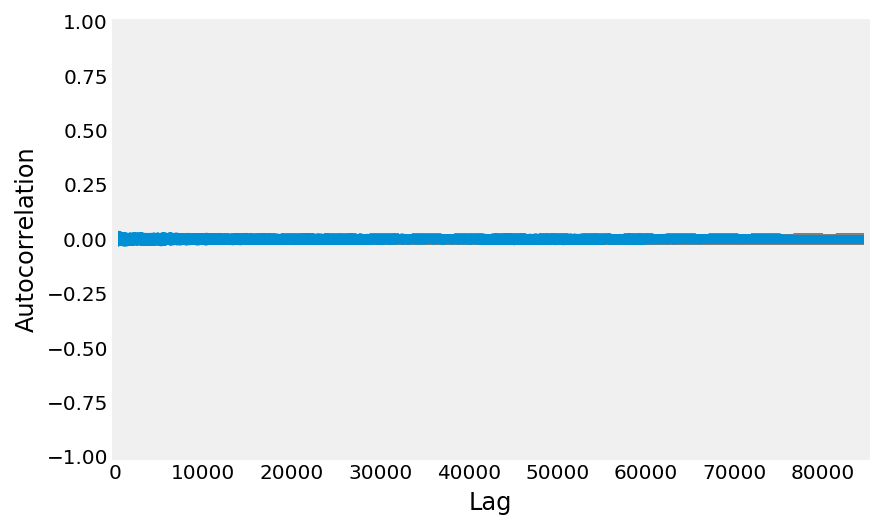

In [57]:
autocorrelation_plot(btc_1["log_close"])

In [64]:
aic = 0
for i in range(0,3):
    for j in range(0,3):
        try:
            model = ARIMA(btc_1["log_close"], order=(i,0,j))
            model_fit = model.fit(disp=0)
            print("model converged for",i,j)
        except:
            model = ARIMA(btc_1["log_close"], order=(0,0,0))
            model_fit = model.fit(disp=0)
            print("model did not converge for",i,j)
            
        
        if model_fit.aic<aic:
            print("model_fit_aic",model_fit.aic)
            aic = model_fit.aic
            best_parameter_i = i
            best_parameter_j = j
        
        
        
model = ARIMA(btc_1["log_close"], order=(best_parameter_i,0,best_parameter_j))
model_fit = model.fit(disp=0)


print(model_fit.summary())
print(model_fit.aic)

/anaconda3/lib/python3.6/site-packages/scipy/signal/signaltools.py:1341: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out_full[ind] += zi
/anaconda3/lib/python3.6/site-packages/scipy/signal/signaltools.py:1344: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out = out_full[ind]
/anaconda3/lib/python3.6/site-packages/scipy/signal/signaltools.py:1350: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `ar

model converged for 0 0
model_fit_aic -827157.9143852445
model converged for 0 1
model_fit_aic -827224.43107462
model converged for 0 2
model_fit_aic -827225.2306072123
model converged for 0 3
model_fit_aic -827253.3204226149
model converged for 1 0
model converged for 1 1
model converged for 1 2
model converged for 1 3
model converged for 2 0
model converged for 2 1


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


model converged for 2 2


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


model converged for 2 3
model converged for 3 0
model_fit_aic -827253.7255977418
model converged for 3 1
model converged for 3 2
model did not converge for 3 3
                              ARMA Model Results                              
Dep. Variable:              log_close   No. Observations:                84961
Model:                     ARMA(3, 0)   Log Likelihood              413631.863
Method:                       css-mle   S.D. of innovations              0.002
Date:                Sat, 20 Oct 2018   AIC                        -827253.726
Time:                        17:53:34   BIC                        -827206.976
Sample:                             0   HQIC                       -827239.433
                                                                              
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const           -3.642e-06   6.35e-06   

Final model is an ARIMA(3,0,0), indicating signficiant information available in past prices. 

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: 'pandas.tools.plotting.autocorrelation_plot' is deprecated, import 'pandas.plotting.autocorrelation_plot' instead.
  """Entry point for launching an IPython kernel.


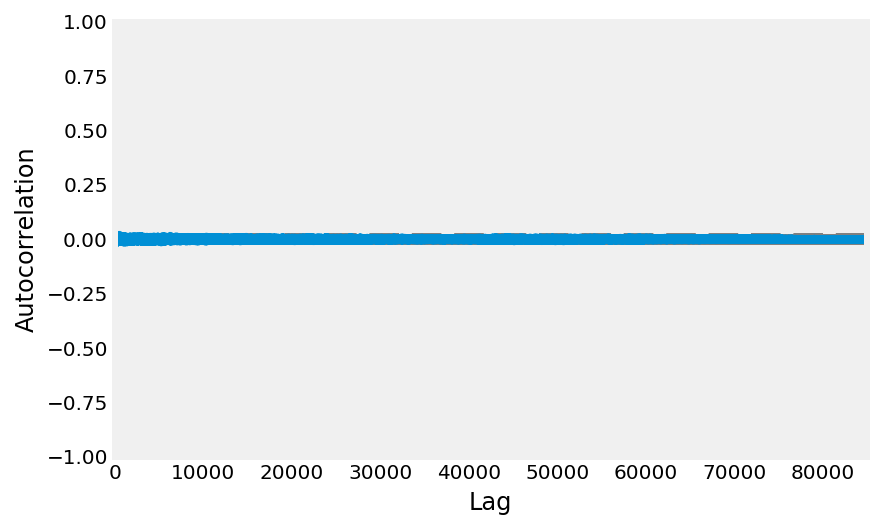

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: 'pandas.tools.plotting.autocorrelation_plot' is deprecated, import 'pandas.plotting.autocorrelation_plot' instead.
  This is separate from the ipykernel package so we can avoid doing imports until


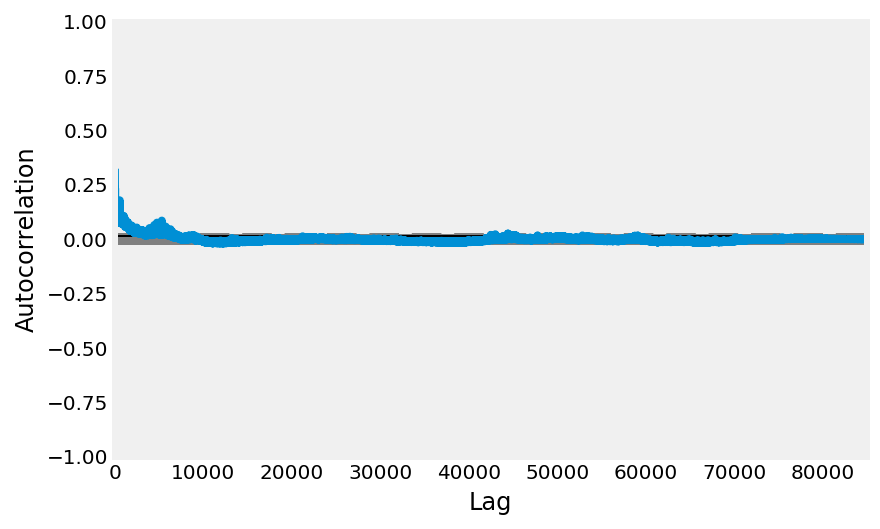

In [65]:
autocorrelation_plot(model_fit.resid)
plt.show()
autocorrelation_plot(model_fit.resid*model_fit.resid)
plt.show()

Residuals show no pattern. However, squared residuals show very strong patterns event in the range of 5000 lags, indicating need for additional modeling (GARCH). This can be clearly seen in the next plot which shows that variance varies strongly. 

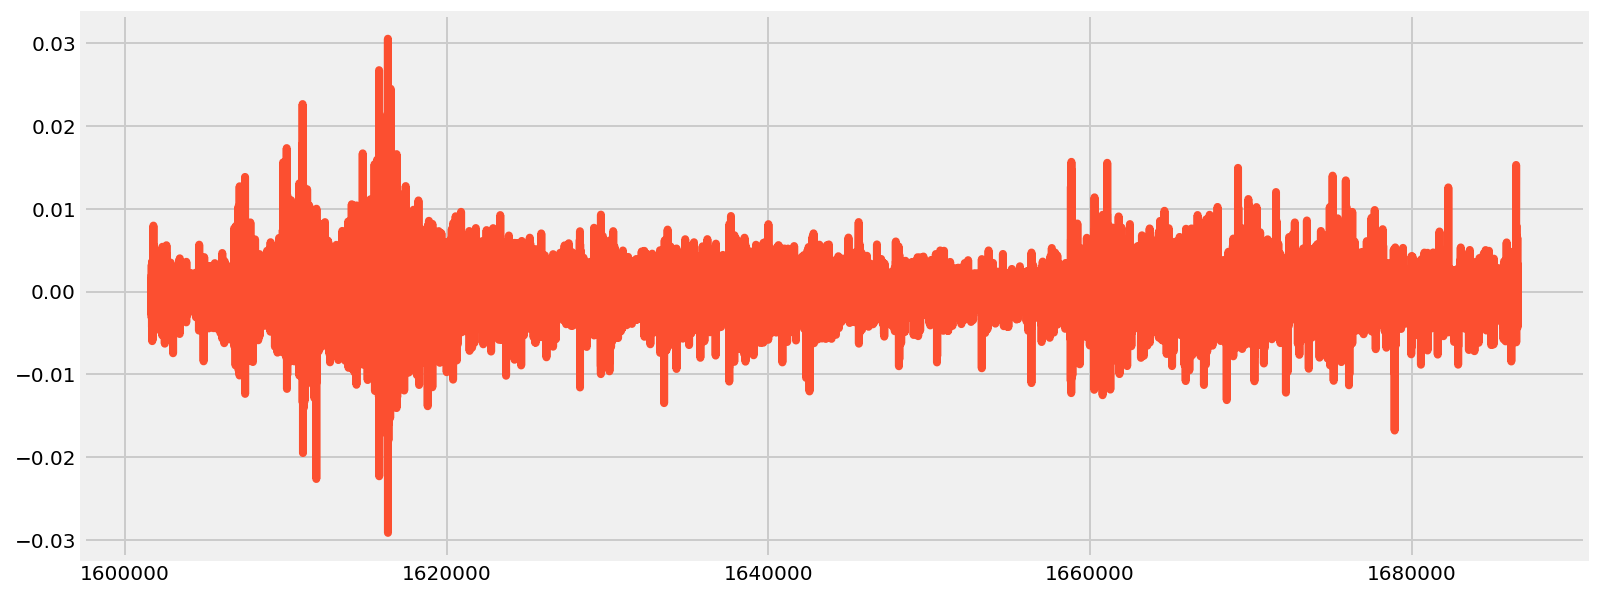

In [66]:
btc_log_close = btc_1['log_close']

btc_log_close.plot(lw=0.5, figsize=(12, 5))
plt.plot(btc_log_close)
plt.show()

In [75]:
# garch modelling
#https://machinelearningmastery.com/develop-arch-and-garch-models-for-time-series-forecasting-in-python/
#http://barnesanalytics.com/garch-models-in-python
from arch import arch_model

returns = btc_1["log_close"]

model=arch_model(returns, vol='Arch', p=10, mean = 'Zero')
results=model.fit()
print(results.summary())




Iteration:      1,   Func. Count:     13,   Neg. LLF: -432847.2001920703
Inequality constraints incompatible    (Exit mode 4)
            Current function value: -432847.2001921158
            Iterations: 1
            Function evaluations: 13
            Gradient evaluations: 1


/anaconda3/lib/python3.6/site-packages/arch/univariate/base.py:522: ConvergenceWarning: 
The optimizer returned code 4. The message is:
Inequality constraints incompatible
See scipy.optimize.fmin_slsqp for code meaning.

  ConvergenceWarning)


                        Zero Mean - ARCH Model Results                        
Dep. Variable:              log_close   R-squared:                       0.000
Mean Model:                 Zero Mean   Adj. R-squared:                  0.000
Vol Model:                       ARCH   Log-Likelihood:                432847.
Distribution:                  Normal   AIC:                          -865672.
Method:            Maximum Likelihood   BIC:                          -865570.
                                        No. Observations:                84961
Date:                Sat, Oct 20 2018   Df Residuals:                    84950
Time:                        18:30:00   Df Model:                           11
                              Volatility Model                              
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
omega      6.9240e-07  2.384e-13  2.904e+06      0.000 [6.

# EDA News Articles

In [96]:
articles = pd.read_csv("final_articles.csv")
                         
articles.head()



,Unnamed: 0,author,contents,description,publisher,source_url,timeStamp,title
0,0,Stripe.com,A complete payments platform engineered for gr...,"At Stripe, we’ve long been excited about the p...",Stripe.com,https://stripe.com/blog/ending-bitcoin-support,2018-01-23 00:00:00+00:00,Ending Bitcoin Support
1,1,Editorial Team,As it scrambles to serve a massively expanding...,As it scrambles to serve a massively expanding...,Finextra.com,https://www.finextra.com/newsarticle/31558/coi...,2018-01-23 00:01:00+00:00,Coinbase hires former Twitter exec to lead cus...
2,2,Scott Scanlon,So many cryptocurrencies. So much money to be ...,So many cryptocurrencies. So much money to be ...,Youbrandinc.com,https://www.youbrandinc.com/crytocurrency/shou...,2018-01-23 00:03:12+00:00,Should you buy bitcoin? Or Ethereum? Or Dash? ...
3,3,http://www.dailymail.co.uk/home/search.html?s=...,By\n\nPress Association\n\t\nPublished:\n 19:...,The Tokyo-based firm has been awarded a paymen...,Daily Mail,http://www.dailymail.co.uk/wires/pa/article-53...,2018-01-23 00:05:47+00:00,World´s biggest Bitcoin exchange wins backing ...
4,4,Phil Glazer,Initial coin offerings (ICOs) are a regulatory...,Initial coin offerings (ICOs) are a regulatory...,Hackernoon.com,https://hackernoon.com/is-regulation-needed-fo...,2018-01-23 00:06:02+00:00,Is Regulation Needed for Institutional Investo...


In [97]:
articles.tail()

,Unnamed: 0,author,contents,description,publisher,source_url,timeStamp,title
20567,20567,Cointelegraph By Rakesh Upadhyay,Cointelegraph\tTechnical analysis on top 9 cry...,"All eyes on the crypto market , as it’s moving...",Cointelegraph.com,https://cointelegraph.com/news/bitcoin-ethereu...,2018-04-23 23:00:25+00:00,"Bitcoin, Ethereum, Bitcoin Cash, Ripple, Stell..."
20568,20568,Scott Scanlon,"Sindri Þór Stefánsson, the man wanted on charg...","Sindri Þór Stefánsson, the man wanted on charg...",Youbrandinc.com,https://www.youbrandinc.com/crytocurrency/icel...,2018-04-23 23:03:06+00:00,Iceland: $2 Mln Bitcoin Mining Theft Suspect V...
20569,20569,Avivah Litan,\tA member of the Gartner Blog Network\tby Avi...,Blockchain sessions were in full force at the ...,Gartner.com,https://blogs.gartner.com/avivah-litan/2018/04...,2018-04-23 23:22:25+00:00,"Blockchain, Crypto, and Women; Musings from RSAC"
20570,20570,Cyberparse.co.uk,Enlarge / Simplified figurative process of a C...,Enlarge / Simplified figurative process of a C...,Cyberparse.co.uk,http://cyberparse.co.uk/2018/04/23/new-hacks-s...,2018-04-23 23:32:00+00:00,New hacks siphon private cryptocurrency keys f...
20571,20571,pjbyrne,"Disclaimer: English lawyer, not practising thi...","Disclaimer: English lawyer, not practising thi...",Prestonbyrne.com,https://prestonbyrne.com/2018/04/23/on-ethereu...,2018-04-23 23:59:35+00:00,Whether Ethereum is a security


In [98]:

articles["year"] = pd.DatetimeIndex(articles["timeStamp"]).year
articles["month"] = pd.DatetimeIndex(articles["timeStamp"]).month
articles["day"] = pd.DatetimeIndex(articles["timeStamp"]).day
articles["hour"] = pd.DatetimeIndex(articles["timeStamp"]).hour
articles["minute"] = pd.DatetimeIndex(articles["timeStamp"]).minute
articles["second"] = pd.DatetimeIndex(articles["timeStamp"]).second

articles['Date'] = pd.to_datetime(articles['timeStamp']).dt.date
articles['Time'] = pd.to_datetime(articles['timeStamp']).dt.time


articles.head()

,Unnamed: 0,author,contents,description,publisher,source_url,timeStamp,title,year,month,day,hour,minute,second,Date,Time
0,0,Stripe.com,A complete payments platform engineered for gr...,"At Stripe, we’ve long been excited about the p...",Stripe.com,https://stripe.com/blog/ending-bitcoin-support,2018-01-23 00:00:00+00:00,Ending Bitcoin Support,2018,1,23,0,0,0,2018-01-23,00:00:00
1,1,Editorial Team,As it scrambles to serve a massively expanding...,As it scrambles to serve a massively expanding...,Finextra.com,https://www.finextra.com/newsarticle/31558/coi...,2018-01-23 00:01:00+00:00,Coinbase hires former Twitter exec to lead cus...,2018,1,23,0,1,0,2018-01-23,00:01:00
2,2,Scott Scanlon,So many cryptocurrencies. So much money to be ...,So many cryptocurrencies. So much money to be ...,Youbrandinc.com,https://www.youbrandinc.com/crytocurrency/shou...,2018-01-23 00:03:12+00:00,Should you buy bitcoin? Or Ethereum? Or Dash? ...,2018,1,23,0,3,12,2018-01-23,00:03:12
3,3,http://www.dailymail.co.uk/home/search.html?s=...,By\n\nPress Association\n\t\nPublished:\n 19:...,The Tokyo-based firm has been awarded a paymen...,Daily Mail,http://www.dailymail.co.uk/wires/pa/article-53...,2018-01-23 00:05:47+00:00,World´s biggest Bitcoin exchange wins backing ...,2018,1,23,0,5,47,2018-01-23,00:05:47
4,4,Phil Glazer,Initial coin offerings (ICOs) are a regulatory...,Initial coin offerings (ICOs) are a regulatory...,Hackernoon.com,https://hackernoon.com/is-regulation-needed-fo...,2018-01-23 00:06:02+00:00,Is Regulation Needed for Institutional Investo...,2018,1,23,0,6,2,2018-01-23,00:06:02


There are only articles from January to end of February 2018.

# EDA Bitcoin Price and News Articles 

# Minute Price: Top positive event

In [99]:
# identify 5 strongest price changes on minute basis 
strongest_changes = btc_1

strongest_changes = strongest_changes.sort_values(by = ["log_close"],ascending = False)
strongest_changes.head()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price,log_close,year,...,hour,minute,Date,Time,Average,Volatility,SD,Average_log,Volatility_log,SD_log
1616345,2018-02-06 05:12:00+00:00,5925.00,6104.79,5907.25,6104.78,718.259885,4.319317e+06,6013.585037,0.030531,2018,...,5,12,2018-02-06,05:12:00,11686.337412,444046.357820,2136.419035,-0.000023,0.521291,0.002508
1615797,2018-02-05 20:04:00+00:00,6562.36,6749.67,6560.58,6738.37,257.987265,1.711522e+06,6634.132083,0.026736,2018,...,20,4,2018-02-05,20:04:00,11815.413134,444671.996834,2139.429142,-0.000021,0.503318,0.002422
1616517,2018-02-06 08:04:00+00:00,6050.00,6200.00,6049.99,6200.00,276.995438,1.698743e+06,6132.747272,0.024491,2018,...,8,4,2018-02-06,08:04:00,11644.928743,445192.192058,2141.931933,-0.000023,0.529462,0.002547
1616346,2018-02-06 05:13:00+00:00,6098.98,6248.00,6047.28,6248.00,430.396450,2.650814e+06,6159.006104,0.023189,2018,...,5,13,2018-02-06,05:13:00,11686.093735,444050.501709,2136.438972,-0.000023,0.521807,0.002511
1611043,2018-02-02 12:50:00+00:00,7540.99,7717.95,7540.00,7713.69,346.681717,2.630468e+06,7587.557905,0.022643,2018,...,12,50,2018-02-02,12:50:00,12594.203893,435423.046811,2094.930111,-0.000015,0.461821,0.002222


In [100]:
# show event
date = strongest_changes.Date.iloc[0]
hour = strongest_changes.hour.iloc[0]
minute = strongest_changes.minute.iloc[0]

plot_event = btc_1[(btc_1.Date ==date)&(btc_1.hour==hour)]
plot_event = plot_event[plot_event.minute<20]

plot_event.head(20)

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price,log_close,year,...,hour,minute,Date,Time,Average,Volatility,SD,Average_log,Volatility_log,SD_log
1616333,2018-02-06 05:00:00+00:00,6012.88,6074.96,6011.00,6061.32,135.680219,8.183022e+05,6031.108765,0.008024,2018,...,5,0,2018-02-06,05:00:00,11689.327878,443952.740403,2135.968618,-0.000023,0.520290,0.002503
1616334,2018-02-06 05:01:00+00:00,6055.00,6070.00,6028.44,6040.00,70.504639,4.267849e+05,6053.288701,-0.003524,2018,...,5,1,2018-02-06,05:01:00,11689.081694,443960.685016,2136.006842,-0.000024,0.520296,0.002503
1616335,2018-02-06 05:02:00+00:00,6039.99,6050.00,6010.01,6025.05,189.316965,1.141921e+06,6031.792960,-0.002478,2018,...,5,2,2018-02-06,05:02:00,11688.834751,443968.613108,2136.044986,-0.000024,0.520301,0.002503
1616336,2018-02-06 05:03:00+00:00,6025.05,6025.05,6011.00,6015.11,71.661153,4.313843e+05,6019.778593,-0.001651,2018,...,5,3,2018-02-06,05:03:00,11688.587554,443976.650651,2136.083656,-0.000024,0.520303,0.002503
1616337,2018-02-06 05:04:00+00:00,6020.00,6022.00,6003.99,6004.01,157.753060,9.480059e+05,6009.429793,-0.001847,2018,...,5,4,2018-02-06,05:04:00,11688.338235,443983.908368,2136.118575,-0.000024,0.520284,0.002503
1616338,2018-02-06 05:05:00+00:00,6004.00,6004.01,6002.01,6003.99,128.115282,7.691877e+05,6003.871215,-0.000003,2018,...,5,5,2018-02-06,05:05:00,11688.088916,443991.160175,2136.153465,-0.000024,0.520284,0.002503
1616339,2018-02-06 05:06:00+00:00,6004.00,6004.00,6000.00,6000.00,300.545041,1.803432e+06,6000.539330,-0.000665,2018,...,5,6,2018-02-06,05:06:00,11687.839503,443998.455881,2136.188567,-0.000024,0.520284,0.002503
1616340,2018-02-06 05:07:00+00:00,6000.00,6000.01,5915.00,5951.00,573.316309,3.417655e+06,5961.203873,-0.008200,2018,...,5,7,2018-02-06,05:07:00,11687.589205,444006.499418,2136.227266,-0.000024,0.520348,0.002504
1616341,2018-02-06 05:08:00+00:00,5951.01,5951.01,5910.00,5912.86,172.296984,1.021554e+06,5929.032043,-0.006430,2018,...,5,8,2018-02-06,05:08:00,11687.338024,444015.030989,2136.268314,-0.000024,0.520388,0.002504
1616342,2018-02-06 05:09:00+00:00,5912.85,5930.00,5909.34,5915.00,154.237749,9.128604e+05,5918.527904,0.000362,2018,...,5,9,2018-02-06,05:09:00,11687.086892,444023.528433,2136.309197,-0.000024,0.520388,0.002504


In [101]:
# identify articles that were pubslished just before the price changed for top event 
date = strongest_changes.Date.iloc[0]
hour = strongest_changes.hour.iloc[0]
minute = strongest_changes.minute.iloc[0]


articles_event = articles[(articles.Date == date)
                  & (articles.hour == hour)
                   #& (articles.minute == minute)
                  ]

articles_event = articles_event[articles_event.minute<12]

print(articles_event.title)


4499    Ethereum Price Technical Analysis – ETH/USD Cr...
4500    Ethereum Price Technical Analysis – ETH/USD Cr...
4501    Bitcoin Will Stabilize, Hit $50K by 2019: Neu-Ner
4502    Bitcoin Will Stabilize, Hit $50K by 2019: Neu-Ner
4503    College kids using Bitcoin to pay for 'huge dr...
4504    College kids using Bitcoin to pay for 'huge dr...
4505    Bitcoin drops below $6,200 for first time in t...
4506    Bitcoin drops below $6,200 for first time in t...
Name: title, dtype: object


Those articles do not seem to be very relevant to immediate price changes 

# Minute Price: Top negative event 

In [102]:
strongest_changes = btc_1

strongest_changes = strongest_changes.sort_values(by = ["log_close"],ascending = True)
strongest_changes.head()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price,log_close,year,...,hour,minute,Date,Time,Average,Volatility,SD,Average_log,Volatility_log,SD_log
1616349,2018-02-06 05:16:00+00:00,6453.52,6468.50,6240.05,6268.18,504.383107,3.198030e+06,6340.478316,-0.029140,2018,...,5,16,2018-02-06,05:16:00,11685.371854,444059.731070,2136.483377,-0.000023,0.523120,0.002517
1611894,2018-02-03 03:01:00+00:00,8490.00,8490.00,8263.61,8300.00,226.726299,1.898333e+06,8372.795063,-0.022633,2018,...,3,1,2018-02-03,03:01:00,12468.946163,443920.201588,2135.812066,-0.000014,0.475082,0.002286
1615806,2018-02-05 20:13:00+00:00,6786.49,6800.00,6650.00,6650.00,139.132871,9.327592e+05,6704.089688,-0.022306,2018,...,20,13,2018-02-05,20:13:00,11813.347313,444680.456202,2139.469842,-0.000021,0.504815,0.002429
1611066,2018-02-02 13:13:00+00:00,8495.01,8495.01,8316.54,8330.92,226.805866,1.903791e+06,8393.923302,-0.019504,2018,...,13,13,2018-02-02,13:13:00,12590.801356,435784.222021,2096.667816,-0.000013,0.464507,0.002235
1616378,2018-02-06 05:45:00+00:00,6455.17,6455.17,6326.24,6341.00,194.138289,1.240454e+06,6389.539433,-0.017973,2018,...,5,45,2018-02-06,05:45:00,11678.399555,444186.011399,2137.090944,-0.000022,0.525753,0.002530


The top negative event happened 4 minutes after the top positive event. Probably, minute bitcoin prices are rather driven by changes in liquidity, volume, etc. and not news article information. 

In [103]:
# identify articles that were pubslished just before the price changed for top event 
date = strongest_changes.Date.iloc[0]
hour = strongest_changes.hour.iloc[0]
minute = strongest_changes.minute.iloc[0]


articles_event = articles[(articles.Date == date)
                  & (articles.hour == hour)
                   #& (articles.minute == minute)
                  ]

articles_event = articles_event[(articles_event.minute<16) ]

print(articles_event.title)

4499    Ethereum Price Technical Analysis – ETH/USD Cr...
4500    Ethereum Price Technical Analysis – ETH/USD Cr...
4501    Bitcoin Will Stabilize, Hit $50K by 2019: Neu-Ner
4502    Bitcoin Will Stabilize, Hit $50K by 2019: Neu-Ner
4503    College kids using Bitcoin to pay for 'huge dr...
4504    College kids using Bitcoin to pay for 'huge dr...
4505    Bitcoin drops below $6,200 for first time in t...
4506    Bitcoin drops below $6,200 for first time in t...
Name: title, dtype: object


No new articles were published between the most negative and most positive event. 

# 15 Minute Price Events: 

Daily prices are likely to be driven by other factors than new news. Look at 15 minute price changes.

In [104]:
strongest_changes = btc_1_15_min

strongest_changes = strongest_changes.sort_values(by = ["log_close"],ascending = False)
strongest_changes.head()

,open,high,low,close,Timestamp,log_close,Average,Volatility,SD,Average_log,Volatility_log,SD_log,Date,Time,year,month,day,hour,minute
Timestamp,,,,,,,,,,,,,,,,,,,
2018-02-02 12:45:00+00:00,7560.00,8252.99,7540.00,8252.99,2018-02-02 12:45:00,0.086779,12592.210486,112484.356323,2096.022226,-0.000199,0.454530,0.008470,2018-02-02,12:45:00,2018,2,2,12,45
2018-02-05 20:15:00+00:00,6694.77,7092.63,6650.01,7090.00,2018-02-05 20:15:00,0.068590,11808.559691,114806.238287,2139.287942,-0.000300,0.485974,0.009056,2018-02-05,20:15:00,2018,2,5,20,15
2018-02-06 05:00:00+00:00,6061.32,6349.44,5907.25,6349.44,2018-02-06 05:00:00,0.054463,11684.688122,114664.582917,2136.648350,-0.000337,0.497885,0.009278,2018-02-06,05:00:00,2018,2,6,5,0
2018-02-06 09:00:00+00:00,6049.00,6376.01,6049.00,6370.01,2018-02-06 09:00:00,0.051546,11626.441187,115044.300177,2143.723963,-0.000336,0.506825,0.009444,2018-02-06,09:00:00,2018,2,6,9,0
2018-02-06 09:30:00+00:00,6452.18,6765.01,6452.18,6765.01,2018-02-06 09:30:00,0.050803,11619.441882,115042.079552,2143.682585,-0.000313,0.509468,0.009493,2018-02-06,09:30:00,2018,2,6,9,30


In [105]:
date = strongest_changes.Date.iloc[0]
hour = strongest_changes.hour.iloc[0]


plot_event = btc_1_15_min[(btc_1_15_min.Date ==date)]
plot_event = plot_event[(plot_event.hour>10) & (plot_event.hour<14)]

plot_event.head(100)

,open,high,low,close,Timestamp,log_close,Average,Volatility,SD,Average_log,Volatility_log,SD_log,Date,Time,year,month,day,hour,minute
Timestamp,,,,,,,,,,,,,,,,,,,
2018-02-02 11:00:00+00:00,8154.00,8159.23,8067.12,8097.84,2018-02-02 11:00:00,-0.004210,12609.036444,111950.600205,2086.076268,-0.000210,0.445211,0.008296,2018-02-02,11:00:00,2018,2,2,11,0
2018-02-02 11:15:00+00:00,8094.99,8124.99,8069.00,8069.00,2018-02-02 11:15:00,-0.003568,12606.716306,112022.099902,2087.408586,-0.000209,0.445210,0.008296,2018-02-02,11:15:00,2018,2,2,11,15
2018-02-02 11:30:00+00:00,8042.09,8076.02,7951.57,7951.57,2018-02-02 11:30:00,-0.014660,12604.308562,112095.565180,2088.777531,-0.000218,0.445347,0.008299,2018-02-02,11:30:00,2018,2,2,11,30
2018-02-02 11:45:00+00:00,7945.00,7985.00,7893.00,7960.99,2018-02-02 11:45:00,0.001184,12601.898097,112168.090266,2090.128956,-0.000218,0.445347,0.008299,2018-02-02,11:45:00,2018,2,2,11,45
2018-02-02 12:00:00+00:00,7981.00,7981.00,7834.73,7834.73,2018-02-02 12:00:00,-0.015987,12599.443139,112245.671316,2091.574594,-0.000223,0.445626,0.008304,2018-02-02,12:00:00,2018,2,2,12,0
2018-02-02 12:15:00+00:00,7830.00,7870.44,7707.71,7707.71,2018-02-02 12:15:00,-0.016345,12596.944809,112328.546484,2093.118881,-0.000229,0.445917,0.008309,2018-02-02,12:15:00,2018,2,2,12,15
2018-02-02 12:30:00+00:00,7670.79,7672.00,7567.00,7567.00,2018-02-02 12:30:00,-0.018424,12594.431670,112419.379101,2094.811447,-0.000233,0.446243,0.008315,2018-02-02,12:30:00,2018,2,2,12,30
2018-02-02 12:45:00+00:00,7560.00,8252.99,7540.00,8252.99,2018-02-02 12:45:00,0.086779,12592.210486,112484.356323,2096.022226,-0.000199,0.454530,0.008470,2018-02-02,12:45:00,2018,2,2,12,45
2018-02-02 13:00:00+00:00,8402.53,8639.81,8330.92,8401.18,2018-02-02 13:00:00,0.017797,12589.993885,112541.002072,2097.077757,-0.000196,0.454789,0.008474,2018-02-02,13:00:00,2018,2,2,13,0


In [111]:
# identify articles that were pubslished just before the price changed for top event 
date = strongest_changes.Date.iloc[0]
hour = strongest_changes.hour.iloc[0]
minute = strongest_changes.minute.iloc[0]


articles_event = articles[(articles.Date == date)
                   #& (articles.minute == minute)
                  ]

articles_event = articles_event[(articles_event.hour>11) & (articles_event.hour<13)]

print(articles_event.title)



3435    Bitcoin's January struggles may hold clues for...
3436                       Morning News: February 2, 2018
3437                           Bitcoin skids below $8,000
3438    4 Bitcoin Stocks I'd Avoid at All Costs -- and...
3439    Bitcoin dropped by ~12% to below $8K, the lowe...
3440    Teen Arrested for Creating Malware That Steals...
3441    Bitcoin set for worst week since 2013 as crypt...
3442    "The Bubble Has Burst" - Bitcoin Tumbles Below...
3443    Asia in 3 minutes: frog’s legs a hit in China;...
3444    Roubini Says Bitcoin Is the 'Biggest Bubble in...
3445    GLOBALES: Bitcoin's Brutal Week Is Even Worse ...
3446    Bitcoin slides further, headed for worst week ...
3447    Catching up on crypto: A quick rundown of term...
3448                Bitcoin set for worst week since 2013
3449    ‘Bitcoin is in trouble’: the cryptocurrency ha...
3450    Bitcoin braces for worst week since 2013 - BBC...
3451    Bitcoin the ‘biggest bubble in human history’,...
3452    Teen A

That is the news before the 8% price surge. Bitcoin has dropped below 8000 hitting a low. News says that there is a bubble in bitcoin prices. And then: the prices suddenly surges by 8% above 8000 again. 

Let us have a look at what happened after bitcoin went over 8000 again: the news is really pessimistic about Bitcoin. Only one article reports that Bicoin went over 8000 again (3522).

In [115]:
date = strongest_changes.Date.iloc[0]
hour = strongest_changes.hour.iloc[0]
minute = strongest_changes.minute.iloc[0]


articles_event = articles[(articles.Date == date)
                   #& (articles.minute == minute)
                  ]
articles_event = articles_event[(articles_event.hour>12) & (articles_event.hour<16)]

print(articles_event.title)

3454    Bitcoin leads cryptocurrency carnage, crashing...
3455    Budget 2018: FM#39;s stance on crypto leaves i...
3456    UBS Warns Employees of Tighter Rules on Person...
3457    Bitcoin leads cryptocurrency carnage, crashing...
3458    Cryptocurrency Traders Lose $115 Billion in 24...
3459    Cryptocurrency Traders Lose $115 Billion in 24...
3460    Data Science trends that are affecting crypto ...
3461    Budget 2018: Bitcoin in India is Dead. Long Li...
3462    Cryptocurrency selling intensifies: Bitcoin he...
3463    Bitcoin price drops below $8,000 for first tim...
3464    Bitcoin plunges below $8k after fall of 55% fr...
3465                                Bitcoin Crashes…Again
3466    Bitcoin Hits Multi-Month Low As Mainstream Med...
3467    'The Mother Of All Bubbles And Biggest Bubble ...
3468    Bitcoin falls below $8,000 as crypto bubble sh...
3469    Diversify They Said: Bitcoin’s Drop Sparks Dou...
3470    Bitcoin Fell Off A Cliff And No One Knows How ...
3471    I-T De

The strongest Bitcoin price surges/drops in intraday data do seem to be triggered by any particular news events. Bitcoins simply seems to behave differently than e.g. stocks, where price more or less immediately adjust to e.g. earnings announcements. 

Also, intra-day data shows in general a strong lag regarding on how long it takes for news to catch up with prices and probably the news author's reference point are on daily Bitcoin price. 

Since we do not have immediate price changes due to news and news in general have daily prices as reference point, we focus on analyzing news events. 

# Daily Price Events:

Following the conclusion from analyzing intraday data, and the fact that Bitcoin price behave more or less random on a daily basis, we must look for news which have a long-term impact on the price. We must look for the kind of news which says, e.g. "Bitcoin is a bubble" and then look for longer lags on how the price develops. The causal relation here is that when the news says that Bitcoin is a bubble and will drop, it will eventually drop. 

It might also make sense to look at different regimes of Bitcoin prices: Regime A with high volatilily where prices tend to show trends (upwards or downwards) and Regime B with lower volatility where prices tend to show no trends. The reason is that the extent to which news affect the price is different between both regimes. 

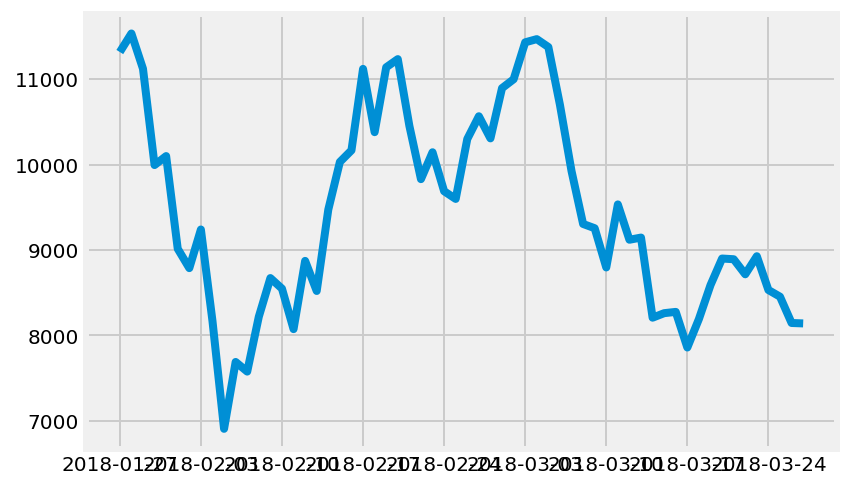

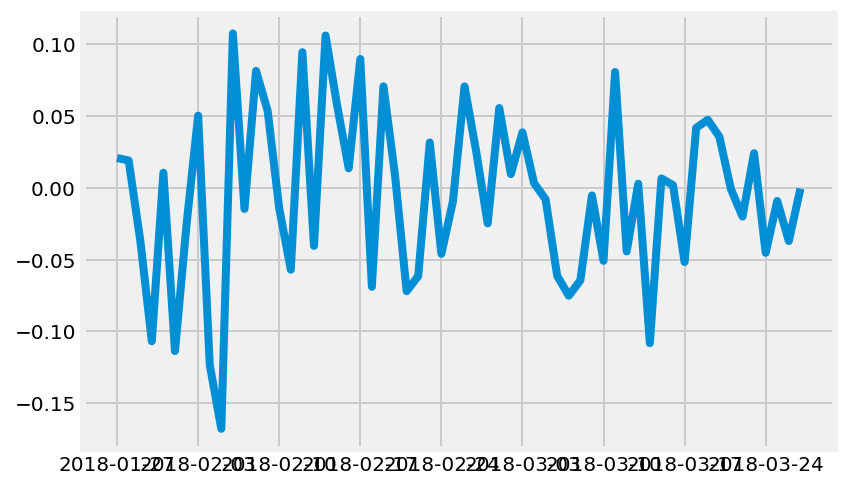

In [116]:
btc_close_daily = btc_1_daily['close']

plt.plot(btc_close_daily)
plt.show()

btc_close_daily_log = btc_1_daily["log_close"]
plt.plot(btc_close_daily_log)
plt.show()

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: 'pandas.tools.plotting.autocorrelation_plot' is deprecated, import 'pandas.plotting.autocorrelation_plot' instead.
  


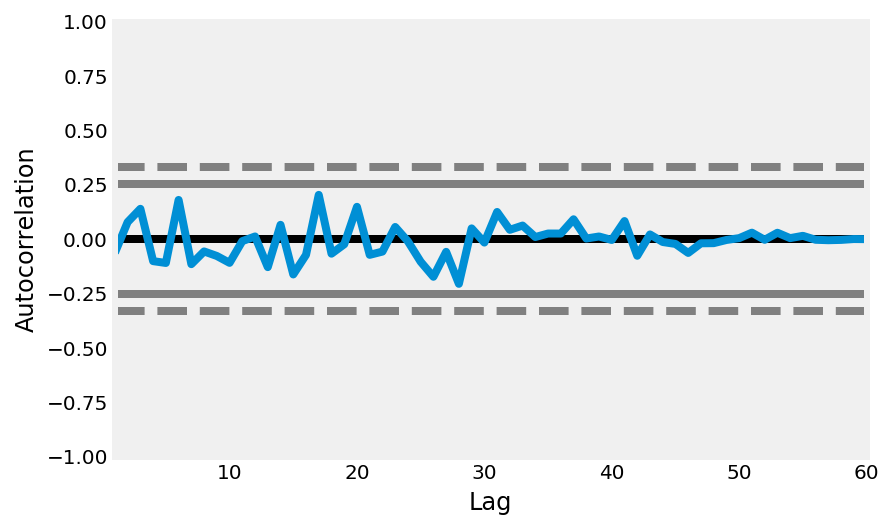

In [117]:
from pandas.tools.plotting import autocorrelation_plot
autocorrelation_plot(btc_1_daily["log_close"])

In [ ]:
from statsmodels.tsa.arima_model import ARIMA
#https://machinelearningmastery.com/arima-for-time-series-forecasting-with-python/

aic = 0
for i in range(0,4):
    for j in range(0,4):
        try:
            model = ARIMA(btc_1_daily["log_close"], order=(i,0,j))
            model_fit = model.fit(disp=0)
            print("model converged for",i,j)
        except:
            model = ARIMA(btc_1_daily["log_close"], order=(0,0,0))
            model_fit = model.fit(disp=0)
            print("model did not converge for",i,j)
            
        
        if model_fit.aic<aic:
            print("model_fit_aic",model_fit.aic)
            aic = model_fit.aic
            best_parameter_i = i
            best_parameter_j = j
        
        
        
model = ARIMA(btc_1_daily["log_close"], order=(best_parameter_i,0,best_parameter_j))
model_fit = model.fit(disp=0)


print(model_fit.summary())
print(model_fit.aic)

In [30]:
# identify 5 strongest price changes on minute basis 
strongest_changes = btc_1_daily

strongest_changes = strongest_changes.sort_values(by = ["log_close"],ascending = False)
strongest_changes.head()

,open,high,low,close,Timestamp,log_close,Average,Volatility,SD,Average_log,Volatility_log,SD_log,Date,Time,year,month,day,hour,minute
Timestamp,,,,,,,,,,,,,,,,,,,
2018-02-06 00:00:00+00:00,6950.00,7925.74,5882.31,7688.46,2018-02-06,0.107447,11393.243000,11591.452319,2116.299970,-0.024790,0.388665,0.070960,2018-02-06,00:00:00,2018,2,6,0,0
2018-02-14 00:00:00+00:00,8522.01,9482.50,8522.01,9472.98,2018-02-14,0.106026,9894.525000,8512.648296,1554.189832,-0.012030,0.421128,0.076887,2018-02-14,00:00:00,2018,2,14,0,0
2018-02-12 00:00:00+00:00,8112.08,8949.99,8100.00,8872.28,2018-02-12,0.094408,10202.966333,9805.112755,1790.160478,-0.015649,0.403047,0.073586,2018-02-12,00:00:00,2018,2,12,0,0
2018-02-17 00:00:00+00:00,10167.49,11148.99,10060.00,11121.50,2018-02-17,0.089685,9802.680667,8193.319597,1495.888655,-0.000547,0.407136,0.074333,2018-02-17,00:00:00,2018,2,17,0,0
2018-02-08 00:00:00+00:00,7580.01,8615.00,7564.99,8218.10,2018-02-08,0.081387,10937.213667,11407.855026,2082.779843,-0.018883,0.398686,0.072790,2018-02-08,00:00:00,2018,2,8,0,0


The price surged by 10% on that day. The top event on daily basis happened on the same day as the top events on a minute basis. Something must have happened on that thay ...
Look at news whether one can find out what ...

In [31]:
# show event
date = strongest_changes.Date.iloc[0]
month = strongest_changes.month.iloc[0]


plot_event = btc_1_daily[(btc_1_daily.month ==month)]
plot_event = plot_event[plot_event.day<10]

plot_event.head(10)

,open,high,low,close,Timestamp,log_close,Average,Volatility,SD,Average_log,Volatility_log,SD_log,Date,Time,year,month,day,hour,minute
Timestamp,,,,,,,,,,,,,,,,,,,
2018-02-01 00:00:00+00:00,10099.98,10156.99,8400.05,9014.23,2018-02-01,-0.113730,12716.152000,11856.355309,2164.664417,-0.016486,0.344326,0.062865,2018-02-01,00:00:00,2018,2,1,0,0
2018-02-02 00:00:00+00:00,9010.46,9080.00,7540.00,8787.52,2018-02-02,-0.025472,12505.798000,12218.705596,2230.820226,-0.018041,0.342199,0.062477,2018-02-02,00:00:00,2018,2,2,0,0
2018-02-03 00:00:00+00:00,8798.69,9476.68,8155.01,9240.00,2018-02-03,0.050209,12308.965000,12325.667619,2250.348730,-0.016471,0.348396,0.063608,2018-02-03,00:00:00,2018,2,3,0,0
2018-02-04 00:00:00+00:00,9169.65,9350.00,7860.00,8167.91,2018-02-04,-0.123329,12015.895000,12025.723679,2195.586710,-0.024355,0.337449,0.061610,2018-02-04,00:00:00,2018,2,4,0,0
2018-02-05 00:00:00+00:00,8196.48,8349.16,6449.02,6905.19,2018-02-05,-0.167940,11676.101667,11888.059550,2170.452794,-0.030225,0.364741,0.066592,2018-02-05,00:00:00,2018,2,5,0,0
2018-02-06 00:00:00+00:00,6950.00,7925.74,5882.31,7688.46,2018-02-06,0.107447,11393.243000,11591.452319,2116.299970,-0.024790,0.388665,0.070960,2018-02-06,00:00:00,2018,2,6,0,0
2018-02-07 00:00:00+00:00,7700.00,8639.61,7214.48,7575.75,2018-02-07,-0.014768,11145.976667,11581.428189,2114.469822,-0.022756,0.385157,0.070320,2018-02-07,00:00:00,2018,2,7,0,0
2018-02-08 00:00:00+00:00,7580.01,8615.00,7564.99,8218.10,2018-02-08,0.081387,10937.213667,11407.855026,2082.779843,-0.018883,0.398686,0.072790,2018-02-08,00:00:00,2018,2,8,0,0
2018-02-09 00:00:00+00:00,8234.45,8699.99,7750.00,8671.01,2018-02-09,0.053646,10730.408000,10866.568176,1983.954837,-0.017990,0.402744,0.073531,2018-02-09,00:00:00,2018,2,9,0,0


In [32]:
# identify articles that were pubslished just before the price changed for top event 
date = strongest_changes.Date.iloc[0]
month = strongest_changes.month.iloc[0]
day = strongest_changes.day.iloc[0]

articles_event = articles[(articles.month == month)
                  & (articles.day == day)
                   #& (articles.minute == minute)
                  ]

print("articles published on same day")
print(articles_event.title)

print()
print()
print("articles published on day before")
articles_event = articles[(articles.month == month)
                  & (articles.day == day-1)
                   #& (articles.minute == minute)
                  ]
print(articles_event.title)

articles published on same day
4393    DavorCoin: Texas State Securities Board Issues...
4394    Lingerie tycoon Michelle Mone and her billiona...
4395    Banks, Retailers, China Have All Turned On Bit...
4396    China prepares fresh ICO rules, eyes overseas ...
4397    China prepares fresh ICO rules, eyes overseas ...
4398    Closer regulation of Bitcoin is needed, federa...
4399    The Dow Just Lost Even More Than Bitcoin. But ...
4400            Bitcoin extends slide, falls below $7,000
4401            Bitcoin extends slide, falls below $7,000
4402    Cryptocurrency market cap down $500 billion in...
4403    Cryptocurrency market cap down $500 billion in...
4404                                  Just Add Blockchain
4405                                  Just Add Blockchain
4406        3 Charts to Know: Bitcoin Plunges Below $7000
4407        3 Charts to Know: Bitcoin Plunges Below $7000
4408    Nithin Eapen (Arcadia Crypto Ventures): “[Cryp...
4409    Nithin Eapen (Arcadia Crypto Vent

Appearantly, bitcoin has lost a lot in the couple of days and then came back wit a strong surge of 10%. Is this driven by news?
Here, there might be some positive news ...

TBC

# Learnings

Learnings:
- different lags of impact on price need to be considered
- most price changes might not be news-driven 
- a significant amount of news reflects past bitcoin price movements 
- when looking at all news related to Bicoin, most news probably do not have a significant short-term influence on Bitcoin
- The mass of news might have a long-term impact on Bitcoin, increasing its popularity. However, this is the mass of news and not driven by single articles, on average. 
- TBC